SAS & HSE, Applied Time Series Forecasitng , Winter 2022 

<font color="blue"> HW #2 </font>

<span style="color:black; font-size: 12pt"></span>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**: 
- Присылайте выполненное задание в гугл-форму: https://forms.gle/G9e9L3ue3cFhNppf7
- Выполненное дз сохраните в файл Surname_w2022_23_hw2.ipynb, например, ivanov_w2022_23_hw2.ipynb

**Вопросы**:
- Присылайте вопросы в slack в соответствующий канал

**Deadline**: <font color="red"> 10-Jan-2023 11:59:59 pm CET </font>

В случае присланного решения позже дедлайна максимальный бал буде снижен согласно формуле

$$МаксимальныйБалл=\max\bigl(3,max(0,(10-ДнейПослеДедлайна/7))) \bigr).$$
График зависимости максимально возможного балла за ДЗ от просрочки дедлайна приведён ниже: 

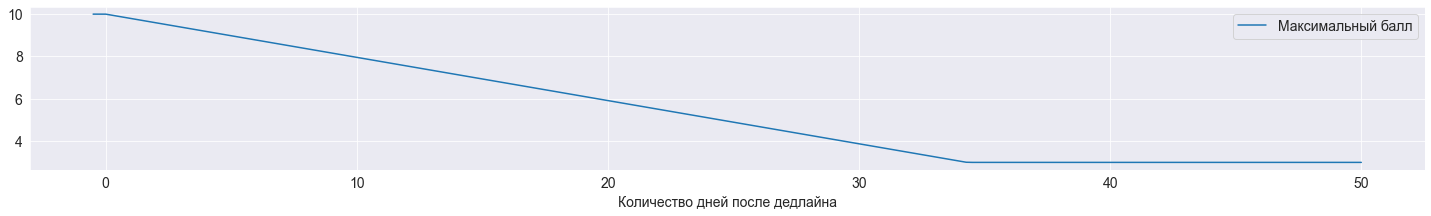

In [ ]:
import pandas as pd
import numpy as np
a = 2
ax = pd.DataFrame(data = [[x, min(10, 10*max(0.3, (1-x/49)))] for x in np.linspace(-0.5,50,200)], columns = ['Количество дней после дедлайна', 'Максимальный балл']).set_index('Количество дней после дедлайна').plot(figsize = (25,3), grid = True)

<h1 align="center">Check Questions (5%)</h1> 


**Questions 1: Write down an equation for $y_t$ (in a form $y_t=f\left(y_{t-1}, \ldots,y_{t-n}, \varepsilon_t, \ldots, \varepsilon_{t-m}\right)$)  that corresponds to the following ARIMA models**:
 - 1) ARIMA $(p=0,d=k,q=1)$,
    
    $(1-B)^ky_t=(1-\phi_1B)\epsilon_t$
    $y_t - C_k^1y_{t-1}+C_k^2y_{t-2}-...+(-1)^ky_{t-k}=(1-\phi_1B)\epsilon_t$
    $y_t= C_k^1y_{t-1}-C_k^2y_{t-2}+...-(-1)^{k}y_{t-k}+\epsilon_t-\phi_1\epsilon_{t-1}$
    <br></br>

 - 2) ARIMA $(p=0,d=k+1,q=1)(P=1, D=1, Q=0)_s$,   
    $(1-B)^{k+1}(1-B^s)y_t=c+\alpha_1y_{t-1}+\delta_1y_{t-s}+\epsilon_t$

    $(1-B)^{k+1}(y_t-y_{t-s})=c+\alpha_1y_{t-1}+\delta_1y_{t-s}+\epsilon_t$

    $(1-B)^{k+1}y_t-(1-B)^{k+1}y_{t-s}=c+\alpha_1y_{t-1}+\delta_1y_{t-s}+\epsilon_t$

    $y_t=C_{k+1}^1y_{t-1}-C_{k+1}^2y_{t-2}+\ldots-(-1)^{k+1}y_{t-k-1}+y_{t-s}-C_{k+1}^1y_{t-s-1}+C_{k+1}^2y_{t-s-2}-\ldots+(-1)^{k+1}y_{t-s-k-1}+c+\alpha_1y_{t-1}+\delta_1y_{t-s}+\epsilon_t$


In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa import stattools
from copy import deepcopy

# don't forget to upload utils file to the colab session
import warnings, pylab
warnings.filterwarnings('ignore')

# setting of the plotting style, registers pandas date converters for matplotlib and the default figure size
import seaborn as sns
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(25, 5))
sns.mpl.rc("font", size=14)

<h1 align="center"> Practice</h1>

<h2 align="center">  1. Download data for following data sets (15%)</h2>


* 0) Download data
  <span style="color:blue; font-family:'New Times Roman'; font-size:14pt"> 
  
  description of the target ts you can find here  https://docs.google.com/spreadsheets/d/1HwwDZMCVUl-wpdY39TdBBKMwvks9VTe2gIpFtGBu-28/edit#gid=1251818784 </span> sheet "TS" in column O

* 1) plot target ts 
* 2) plot cros-series plot: independent variables and target variable on the same subplot 
* 3) answer the questions: 
    - is there seasonality? If there is seasonality then define period(s) of seasonality.
    - trend?
    - not-stable dispersion? 
* 4) define the proper list of transformations in order to make thet ts stationary (find optimal lambda in Box-Cox tranformation, if needed). 

In [98]:
df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/energy_consumption.csv', parse_dates=['Date'])

ts = df[df.id == 3].drop(columns='id').set_index('Date')['2012-01-01':'2015-01-01']

In [99]:
ts.describe()

,EnergyConsumption,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
count,1097.000000,1097.000000,0.0,0.0,0.0,0.0,0.0,0.0,1097.000000,1097.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,220038.821707,-1.109936,NaN,NaN,NaN,NaN,NaN,NaN,0.139471,0.183227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17095.040907,14.917201,NaN,NaN,NaN,NaN,NaN,NaN,0.346596,0.387029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,183861.704000,-43.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206687.417000,-11.800000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,220225.354000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,232588.956000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,255155.794000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As one can see there are no meaningful values for regressors Temp2, ..., Temp7, Temp1_South_Less, ..., Temp4_South_Less, Temp1_South_Gr, ..., Temp4_South_Gr, so we can drop them.

In [100]:
ts = ts.drop(columns=[f'Temp{i+1}' for i in range(1, 7)], errors='ignore')
ts = ts.drop(columns=[f'Temp{i+1}_South_Less' for i in range(4)], errors='ignore')
ts = ts.drop(columns=[f'Temp{i+1}_South_Gr' for i in range(4)], errors='ignore')

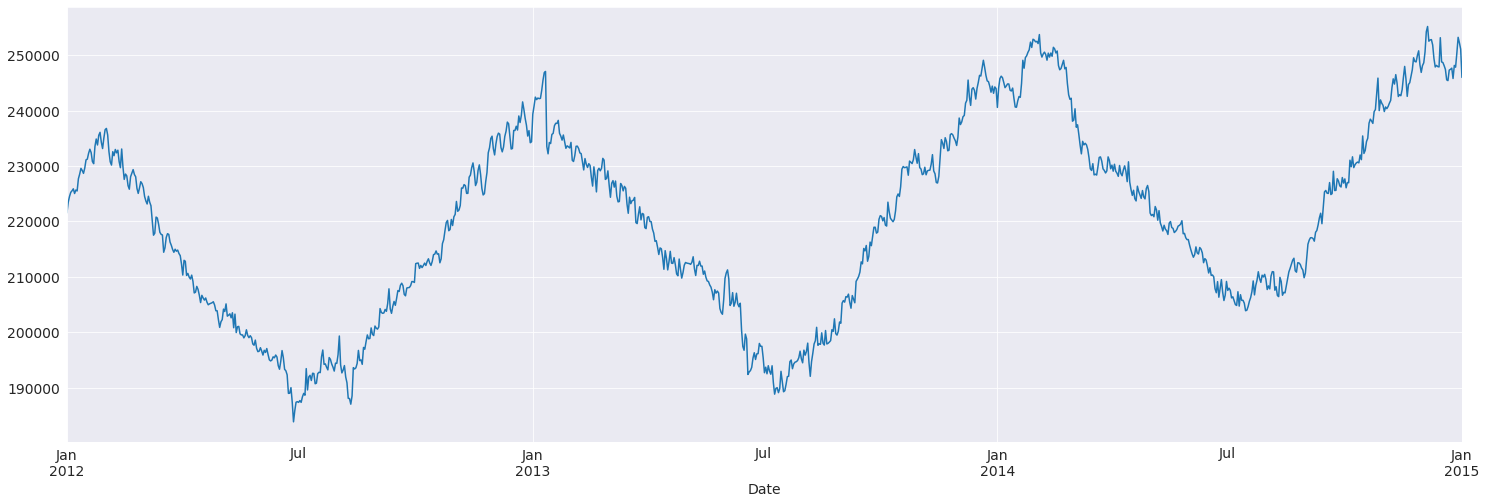

In [101]:
# Plot the TS

ts['EnergyConsumption'].plot(figsize=(25,8));

In [102]:
ts

,EnergyConsumption,Temp1,Saturday,Sunday
Date,,,,
2012-01-01,221553.574,-9.0,0.0,1.0
2012-01-02,223461.204,-15.0,0.0,1.0
2012-01-03,224496.470,-15.0,0.0,1.0
2012-01-04,225248.206,-16.0,0.0,1.0
2012-01-05,225531.568,-20.0,0.0,1.0
...,...,...,...,...
2014-12-28,250372.574,-21.4,0.0,1.0
2014-12-29,253200.723,-25.9,0.0,0.0
2014-12-30,252221.575,-21.0,0.0,0.0


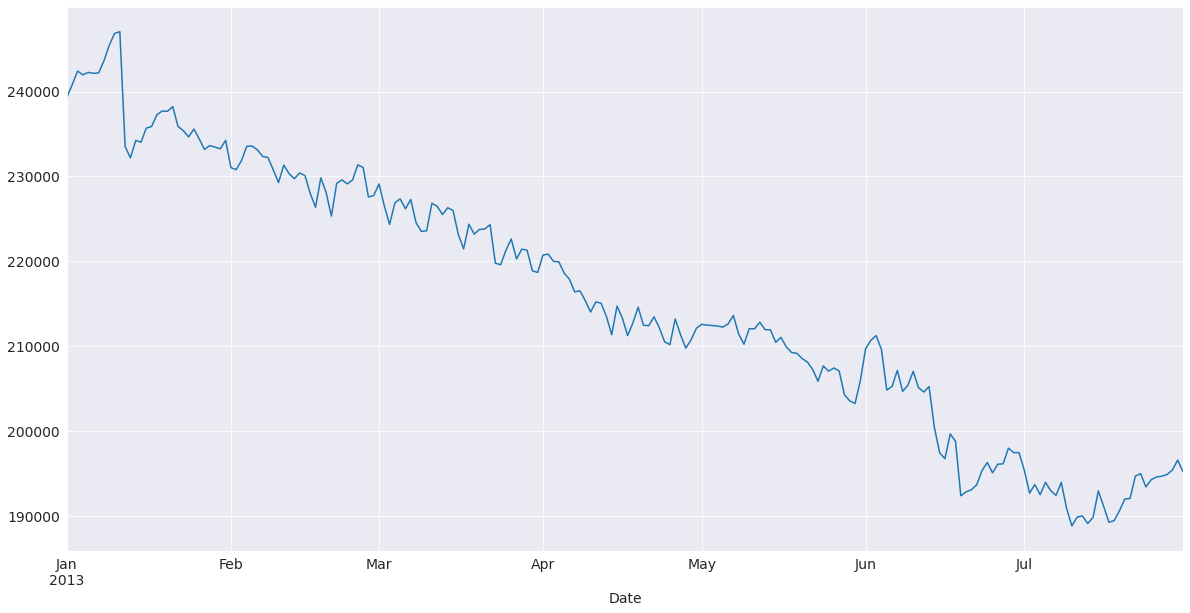

In [103]:
# Plot 6 months in order to try see week seasonality
ts['EnergyConsumption']['2013-01':'2013-07'].plot(figsize=(20,10));

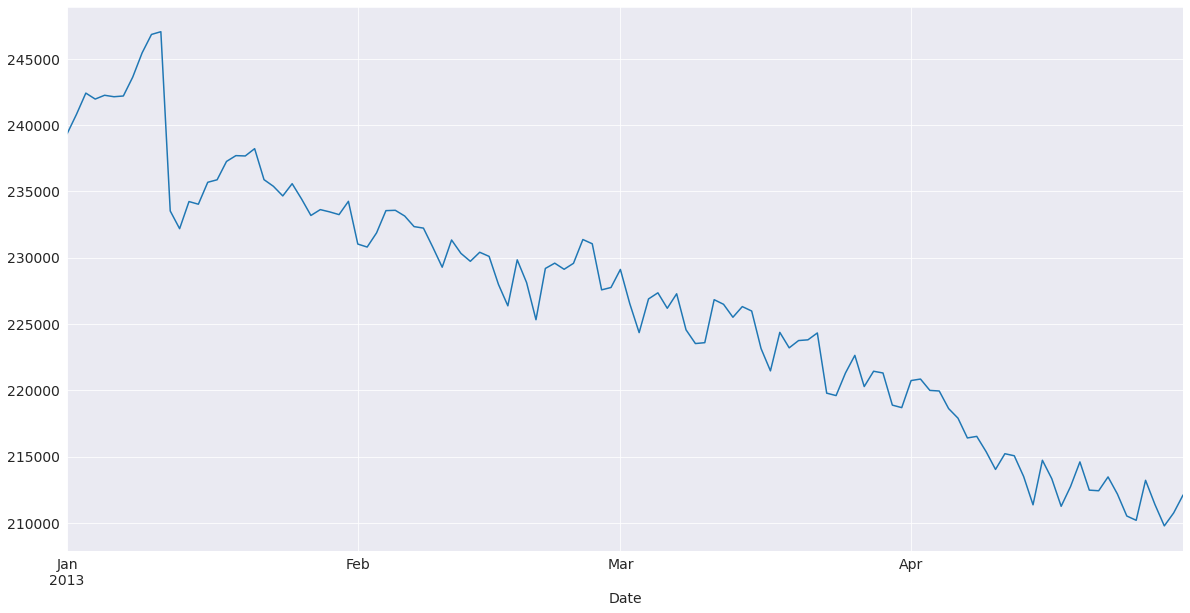

In [104]:
# Plot 3 months in order to try see week seasonality
ts['EnergyConsumption']['2013-01':'2013-04'].plot(figsize=(20,10));

По идее должна быть недельная сезонность, потому что мы оцениваем потребление энергии. Но на данном временном ряде где то наблюдается недельная сезонность, а где то ее нет. Поскольку для решение задачи важно сделать ряд стационарным, попробуем сначала использовать только годовое сезонное дифференцирование, если ряд останется нестационарным, то тогда применим дифференцирование по неделям. Излишнее диффренцирование может только усложнить модель.

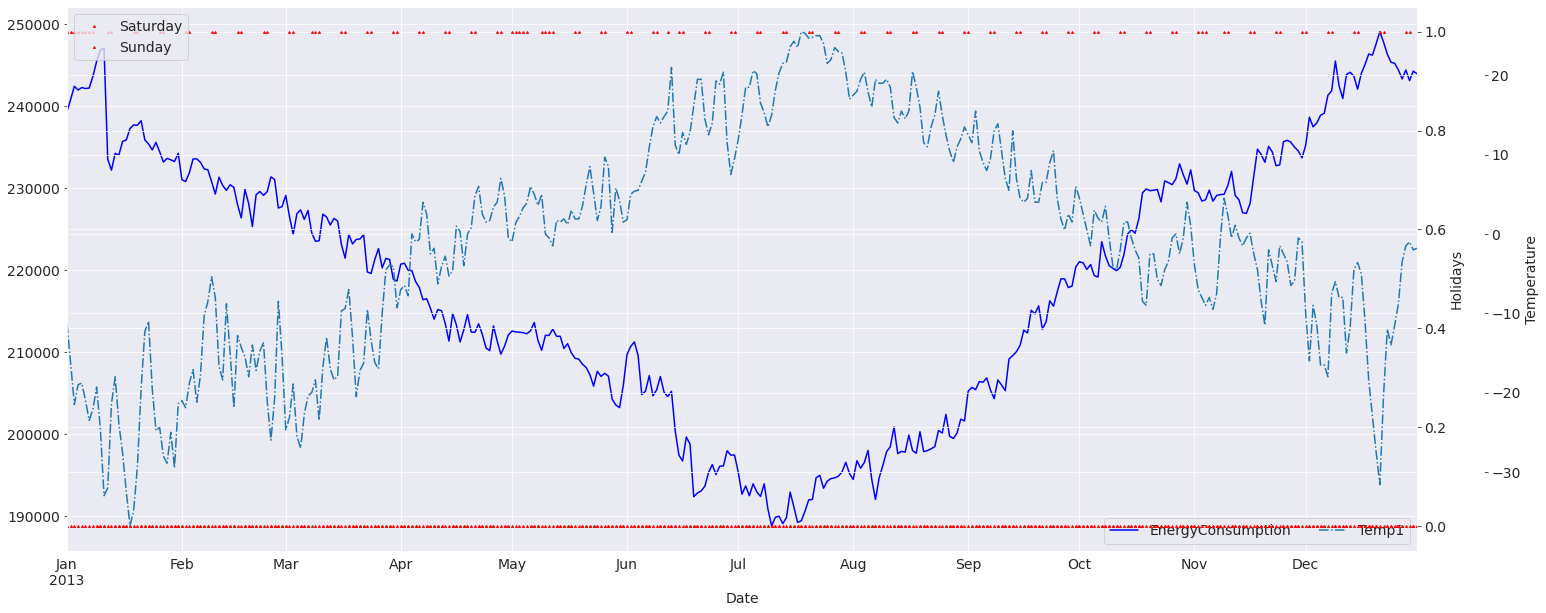

In [105]:
# Plot the TS together with independent variables

fig, ax = plt.subplots(figsize=[30,10])
ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
ax3.set_ylabel('Temperature')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

ts_to_plot = ts.loc['2013-01':'2013-12']
ts_to_plot['EnergyConsumption'].plot(ax = ax,  style='b-')
ts_to_plot[['Saturday', 'Sunday']].plot(ax = ax2, style='r', marker = '^', markersize = 2.0, linewidth=0.0)

for col in ts.columns:
    if col.startswith('Temp'):
        style = '--' if col.endswith('Less') else '-.'
        ts_to_plot[col].plot(ax = ax3,  style=style)

lines = ax.get_lines() + ax3.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='lower right', ncol=3)
ax2.legend(loc='upper left')
plt.show()

One can see from the plots that TS be described as follows:

* there is increasing trend,
* there are yearly of seasonality (period 365) and may be weekly of seasonality (period 7),
* it seems there is no variance instability.

Thus, in order to make the TS stationary

* we need trend differentiation with shift 1,
* we need one seasonal differentiations with shifts 365, if TS will be non-stationary we use also seasonal differentiations with shifts 7,
* we don't need Box-Cox transformation.

<h2 align="center">2. Fit ARIMA Model (50%) </h2>

**I. Build ARIMA forecast manually ** 

You should follow the next scheme:

 * 0) split the ts to two parts: first 80% of timestamps (ts1) and the last 20% of timestamps (ts2)   
 * 1) apply transformation to make the ts1 stationary;
 * 2) define exogenous variables and apply the transformations to them, if needed
 * 3) train simple ARIMA (0, 0, 0) with exogenous variables only, endog = 1) exog = 2);
 * 4) plot ACF/PACF for resifuals of the simple ARIMA(0, 0, 0) in order to understand which $p, P, q, Q$ can be used; define set of candidate parameters for ARMA (for the train TS);
 * 5) select the best parameters of the ARIMA models iteratively: 
    * While there are significant ACF/PACF lags and ARIMA can be trained
      - change only one of 6 ARIMA parameters (p, d, q, P, D, Q) 
      - compare the new model with the previous best model based on  AIC|BIC|HQIC
      - plot ACF/PACF of the best model

  **Note**: there is no goal to minimize AIC|BIC|HQIC, the goal is to exclude all significant autocorrelations from ACF/PACF.

* 6) Check  the best model residuals for 
    - unbiasedness, 
    - stationarity
    - non-autocorrelation
    - white noise hypothesis

    If all tests fail you need to review your choice.
* 7) Run analysis of the regression coafficients
    
    - if there are some insignificant regressors that can be eliminated, please exclude them from the model.

* 8) build forecast for the ts2 (you need to transform exogenous variables if you applied Box-Cox tranformations in step 1); plot this forecast on the same plot with original ts2 data
* 9) Calculate loss MAPE of your forecast. Does the forecast look appropriate?

In [106]:
# Split TS 80%-20%
split_idx = int(len(ts) * 0.8)
ts1 = ts.iloc[:split_idx]
ts2 = ts.iloc[split_idx:]

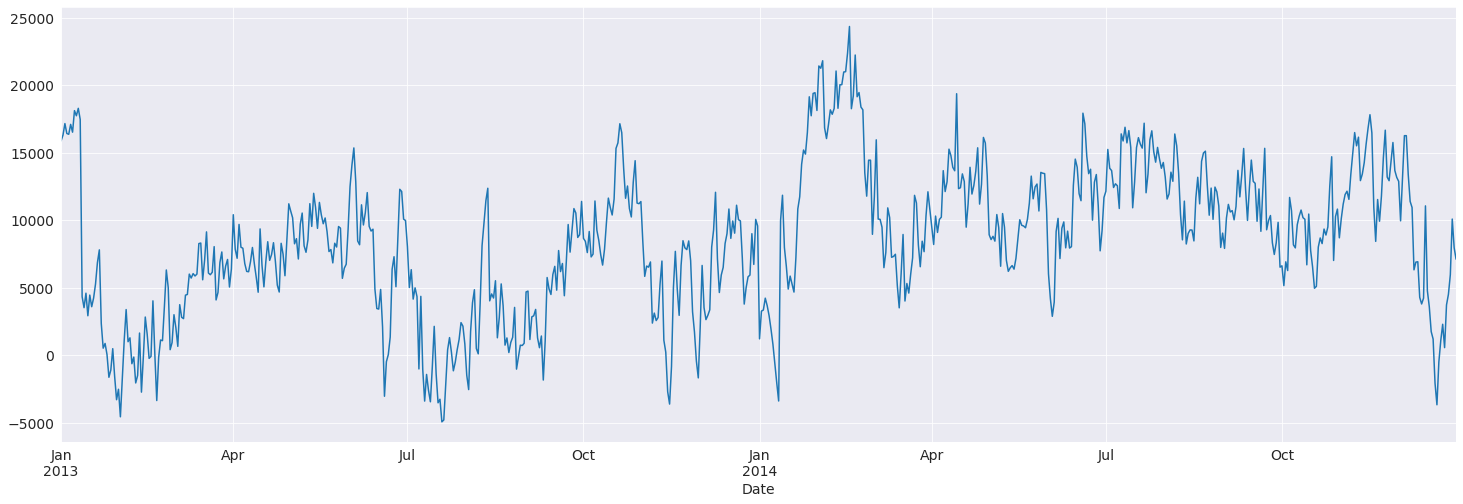

In [107]:
# seasonal differencing 1
s = 365
ts_sdiff = (ts - ts.shift(s)).iloc[s:]
ts_sdiff['EnergyConsumption']['2013':'2014'].plot(figsize=(25,8))
plt.show()

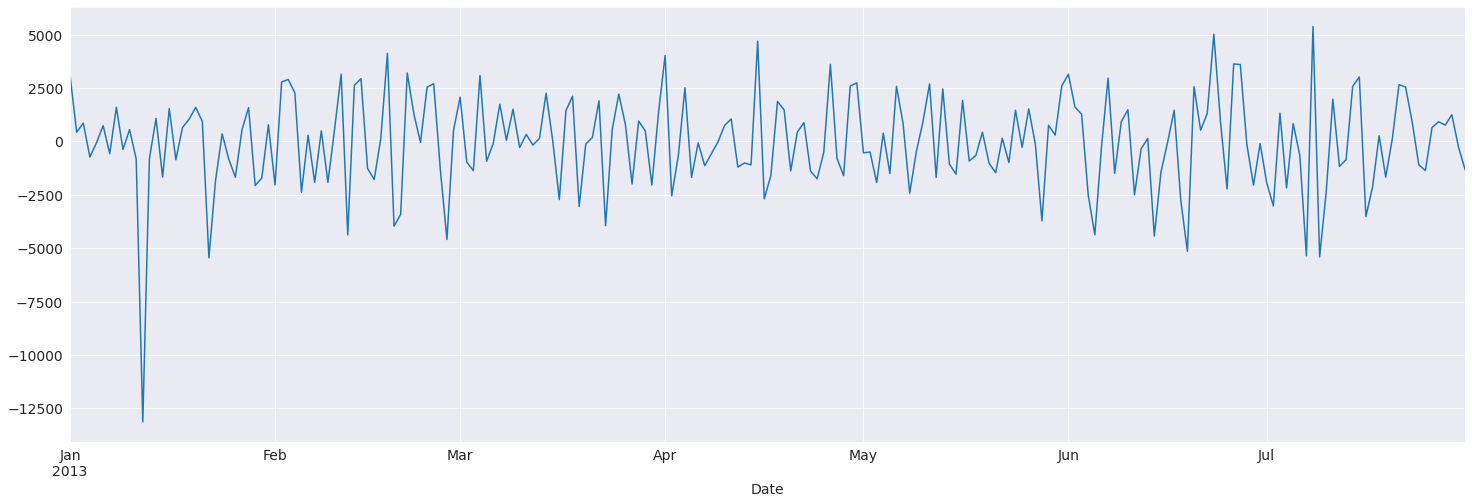

In [108]:
# trend differencing
ts_sdiff_tdiff = (ts_sdiff - ts_sdiff.shift(1)).iloc[1:]
ts_sdiff_tdiff['EnergyConsumption']['2013-01':'2013-07'].plot(figsize=(25,8))
plt.show()

In [109]:
# Augmented Dickey-Fuller unit root test: 
# H0: ts is not stationary (https://www.statisticshowto.com/adf-augmented-dickey-fuller-test/)
df_stat = stattools.adfuller(ts_sdiff_tdiff['EnergyConsumption'])
print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ncritical values: %s' % 
      (df_stat[0], df_stat[1], df_stat[2], df_stat[4]))

The Augmented Dickey-Fuller test statistic -6.255923, 
pvalue: 0.00 
maximal Lag: 20 
critical values: {'1%': -3.439593802573824, '5%': -2.865619356068967, '10%': -2.568942332870462}


In [110]:
# Kwiatkowski–Phillips–Schmidt–Shin
# H0: ts is stationary (https://www.statisticshowto.com/kpss-test/)
kpss_stat= stattools.kpss(ts_sdiff_tdiff['EnergyConsumption'])
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.032557, 
pvalue: 0.10 
maximal Lag: 20 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


According to both Dickey-Fuller and KPSS tests the trasformed TS is stationary.

In [111]:
def plot_acf_pacf(model, lags=365):
    fig = plt.figure(figsize=[25,10])
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(model.resid.values.squeeze(), lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(model.resid.values.squeeze(), lags=lags, ax=ax2)

                              ARMA Model Results                              
Dep. Variable:      EnergyConsumption   No. Observations:                  511
Model:                     ARMA(0, 0)   Log Likelihood               -4621.921
Method:                           css   S.D. of innovations           2050.658
Date:                Mon, 16 Jan 2023   AIC                           9253.841
Time:                        18:43:47   BIC                           9275.023
Sample:                    01-01-2013   HQIC                          9262.145
                         - 05-26-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3981     90.716     -0.037      0.970    -181.199     174.402
Temp1        -35.3911     15.574     -2.272      0.023     -65.915      -4.867
Saturday   -1349.8894    135.365     -9.972      0.0

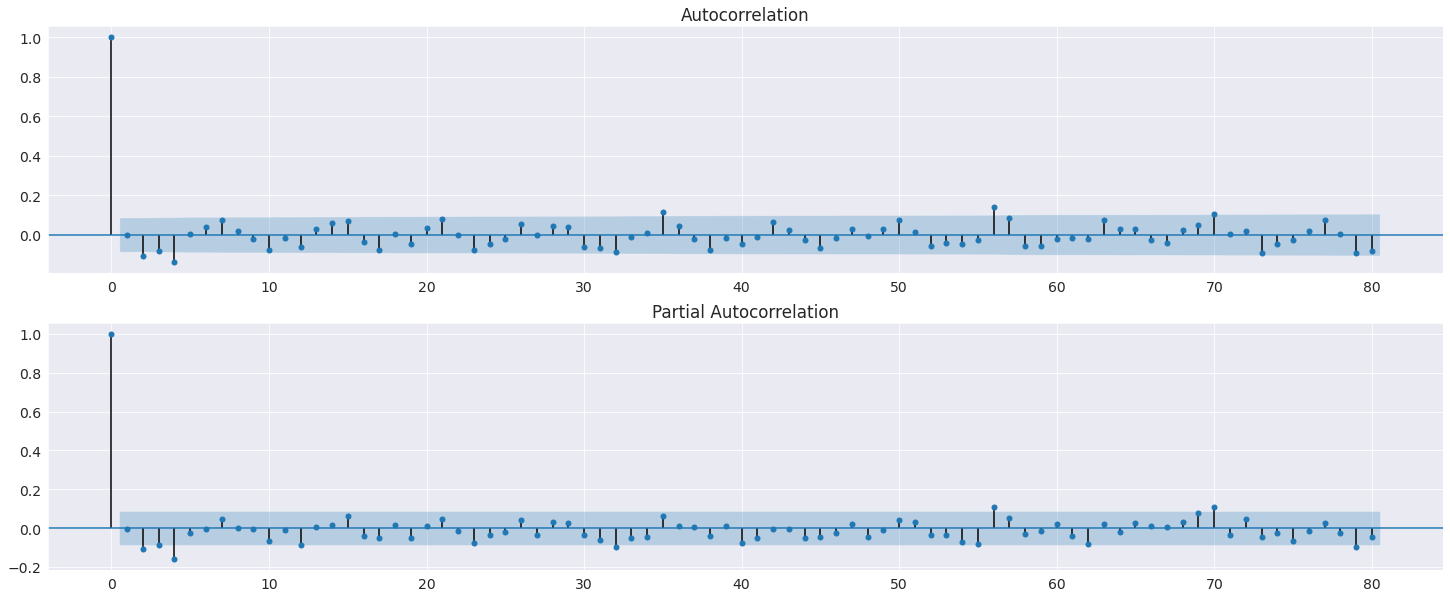

In [112]:
# Step 0: train ARIMA(0,0,0)
ts_sdiff_tdiff_1 = ts_sdiff_tdiff[:-len(ts2)]
endog = ts_sdiff_tdiff_1['EnergyConsumption']
exogs = ts_sdiff_tdiff_1.drop(columns=['EnergyConsumption'])
arima_order_000 = sm.tsa.ARIMA(endog=endog, order=[0,0,0], exog=exogs).fit()
print(arima_order_000.summary())
plot_acf_pacf(arima_order_000, lags=80)

Analysis of ACF and PACF for ARIMA(0,0,0) suggests the following parameter candidate values:

* q = {2,3,4}
* p = {2,3,4}

P и Q this model does not have

Let's move step-by-step and start with changing only one parameter.

                               SARIMAX Results                                
Dep. Variable:      EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([2], 0, 0)   Log Likelihood               -4618.898
Date:                Mon, 16 Jan 2023   AIC                           9247.796
Time:                        18:43:57   BIC                           9268.977
Sample:                    01-01-2013   HQIC                          9256.100
                         - 05-26-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3914     13.919     -2.543      0.011     -62.673      -8.110
Saturday   -1349.8797    133.112    -10.141      0.000   -1610.775   -1088.985
Sunday     -1694.3001    142.161    -11.918      0.0

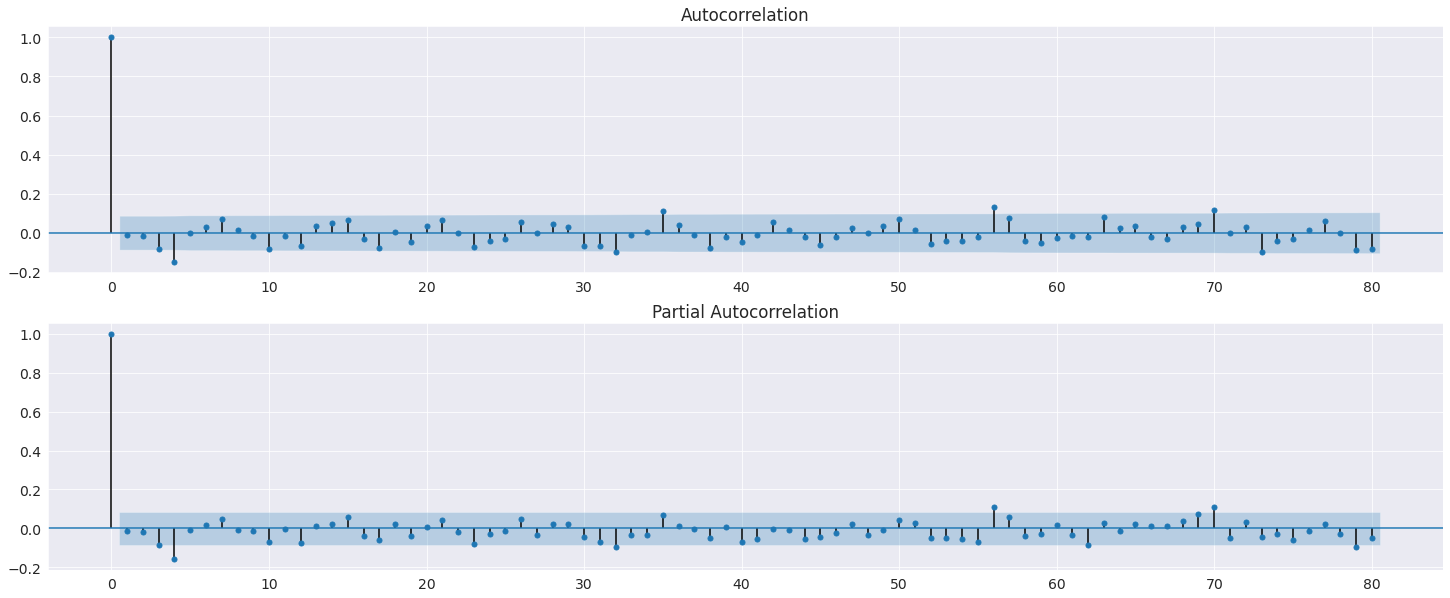

In [113]:
# Step 1: train ARIMA([2],0,0)
arima_order_2_0_0 = sm.tsa.SARIMAX(endog=endog, order=[(2,),0,0], exog=exogs).fit()
print(arima_order_2_0_0.summary())
plot_acf_pacf(arima_order_2_0_0, lags=80)

                               SARIMAX Results                                
Dep. Variable:      EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([3], 0, 0)   Log Likelihood               -4620.119
Date:                Mon, 16 Jan 2023   AIC                           9250.237
Time:                        18:44:02   BIC                           9271.419
Sample:                    01-01-2013   HQIC                          9258.541
                         - 05-26-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3915     13.720     -2.580      0.010     -62.282      -8.501
Saturday   -1349.8797    129.585    -10.417      0.000   -1603.862   -1095.898
Sunday     -1694.3001    137.515    -12.321      0.0

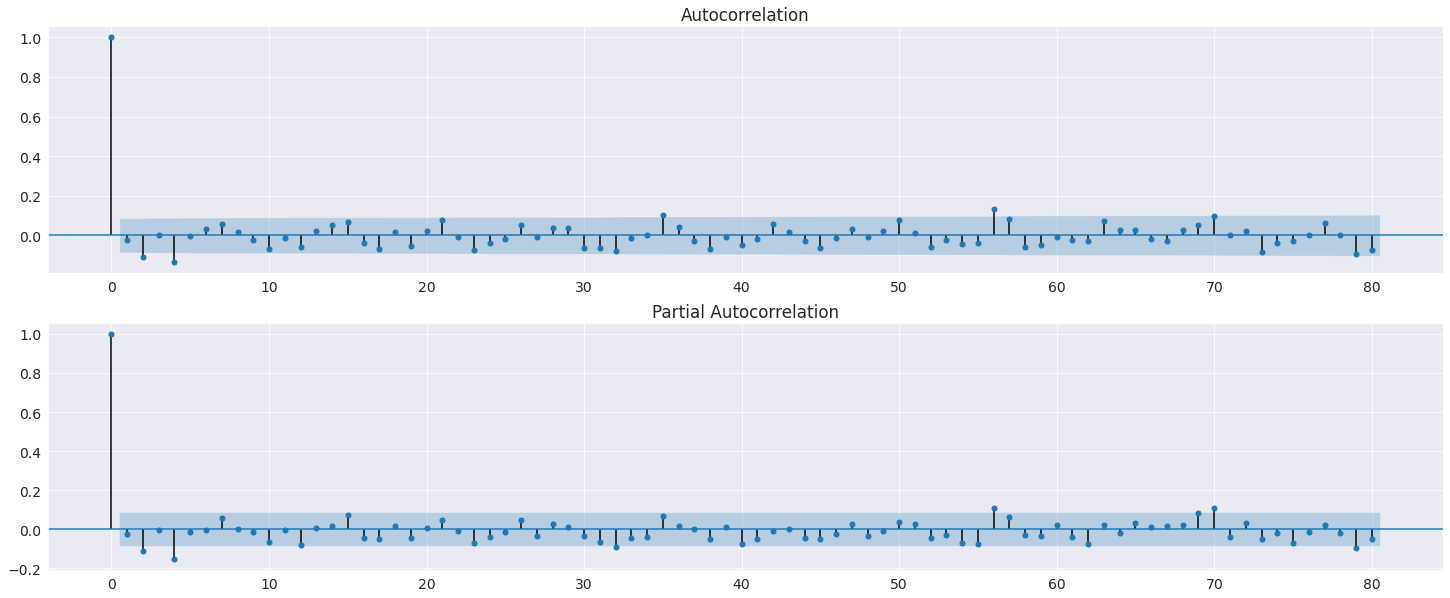

In [114]:
# Step 1: train ARIMA([3],0,0)
arima_order_3_0_0 = sm.tsa.SARIMAX(endog=endog, order=[(3,),0, 0], exog=exogs).fit()
print(arima_order_3_0_0.summary())
plot_acf_pacf(arima_order_3_0_0, lags=80)

                               SARIMAX Results                                
Dep. Variable:      EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([4], 0, 0)   Log Likelihood               -4616.885
Date:                Mon, 16 Jan 2023   AIC                           9243.771
Time:                        18:44:07   BIC                           9264.952
Sample:                    01-01-2013   HQIC                          9252.075
                         - 05-26-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3915     13.680     -2.587      0.010     -62.204      -8.579
Saturday   -1349.8797    126.393    -10.680      0.000   -1597.605   -1102.154
Sunday     -1694.3001    132.387    -12.798      0.0

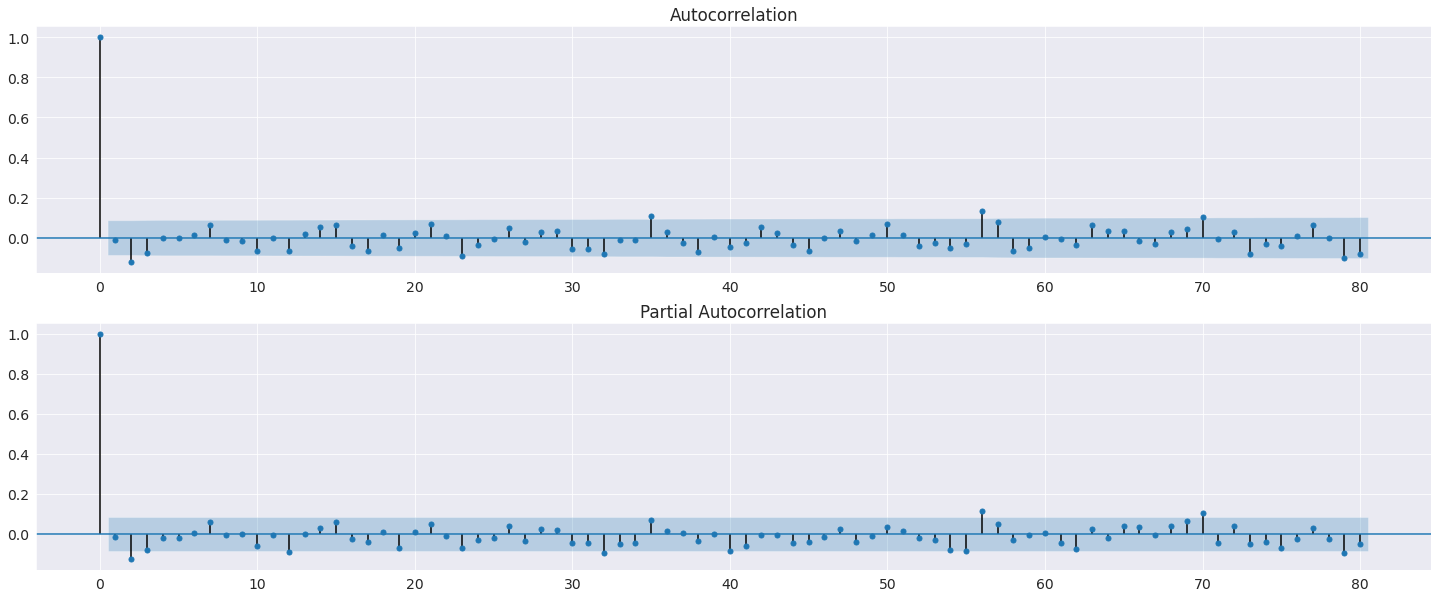

In [115]:
# Step 1: train ARIMA([4],0,0)
arima_order_4_0_0 = sm.tsa.SARIMAX(endog=endog, order=[(4,),0,0], exog=exogs).fit()
print(arima_order_4_0_0.summary())
plot_acf_pacf(arima_order_4_0_0, lags=80)

                                 SARIMAX Results                                 
Dep. Variable:         EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([2, 3], 0, 0)   Log Likelihood               -4617.059
Date:                   Mon, 16 Jan 2023   AIC                           9246.117
Time:                           18:44:12   BIC                           9271.535
Sample:                       01-01-2013   HQIC                          9256.082
                            - 05-26-2014                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3915     13.917     -2.543      0.011     -62.669      -8.114
Saturday   -1349.8797    131.519    -10.264      0.000   -1607.652   -1092.108
Sunday     -1694.3001    141

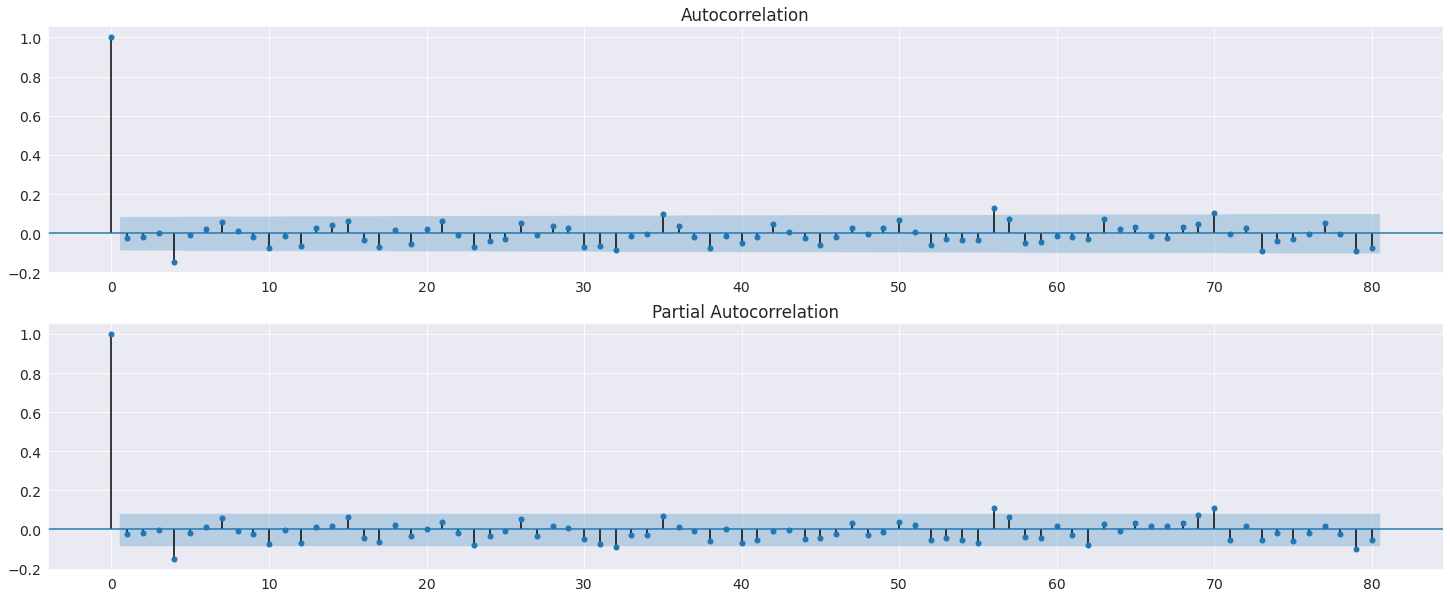

In [116]:
# Step 1: train ARIMA([2, 3],0,0)
arima_order_23_0_0 = sm.tsa.SARIMAX(endog=endog, order=[(2, 3,),0,0], exog=exogs).fit()
print(arima_order_23_0_0.summary())
plot_acf_pacf(arima_order_23_0_0, lags=80)

                                 SARIMAX Results                                 
Dep. Variable:         EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([2, 4], 0, 0)   Log Likelihood               -4612.804
Date:                   Mon, 16 Jan 2023   AIC                           9237.609
Time:                           18:44:18   BIC                           9263.027
Sample:                       01-01-2013   HQIC                          9247.573
                            - 05-26-2014                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3915     13.892     -2.548      0.011     -62.619      -8.164
Saturday   -1349.8797    127.954    -10.550      0.000   -1600.665   -1099.094
Sunday     -1694.3001    135

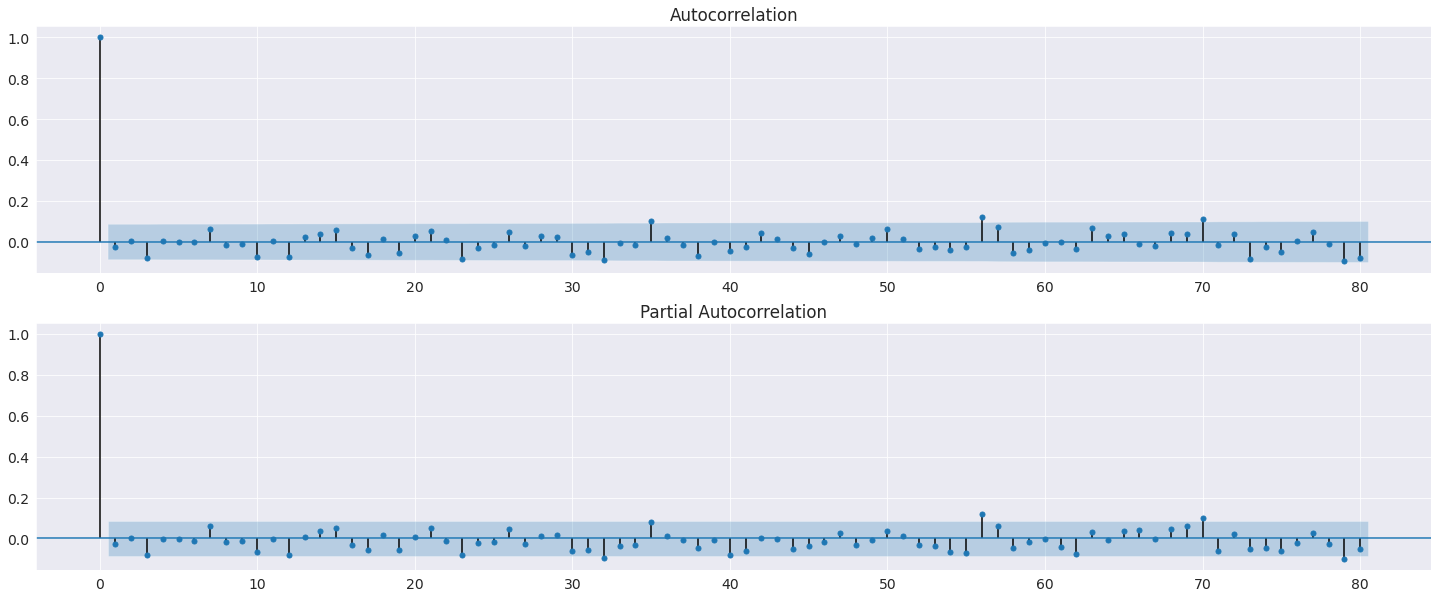

In [117]:
# Step 1: train ARIMA([2, 4],0,0)
arima_order_24_0_0 = sm.tsa.SARIMAX(endog=endog, order=[(2, 4,),0,0], exog=exogs).fit()
print(arima_order_24_0_0.summary())
plot_acf_pacf(arima_order_24_0_0, lags=80)

                                 SARIMAX Results                                 
Dep. Variable:         EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([3, 4], 0, 0)   Log Likelihood               -4615.031
Date:                   Mon, 16 Jan 2023   AIC                           9242.062
Time:                           18:44:23   BIC                           9267.480
Sample:                       01-01-2013   HQIC                          9252.027
                            - 05-26-2014                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3916     13.631     -2.596      0.009     -62.108      -8.675
Saturday   -1349.8797    125.234    -10.779      0.000   -1595.334   -1104.426
Sunday     -1694.3001    131

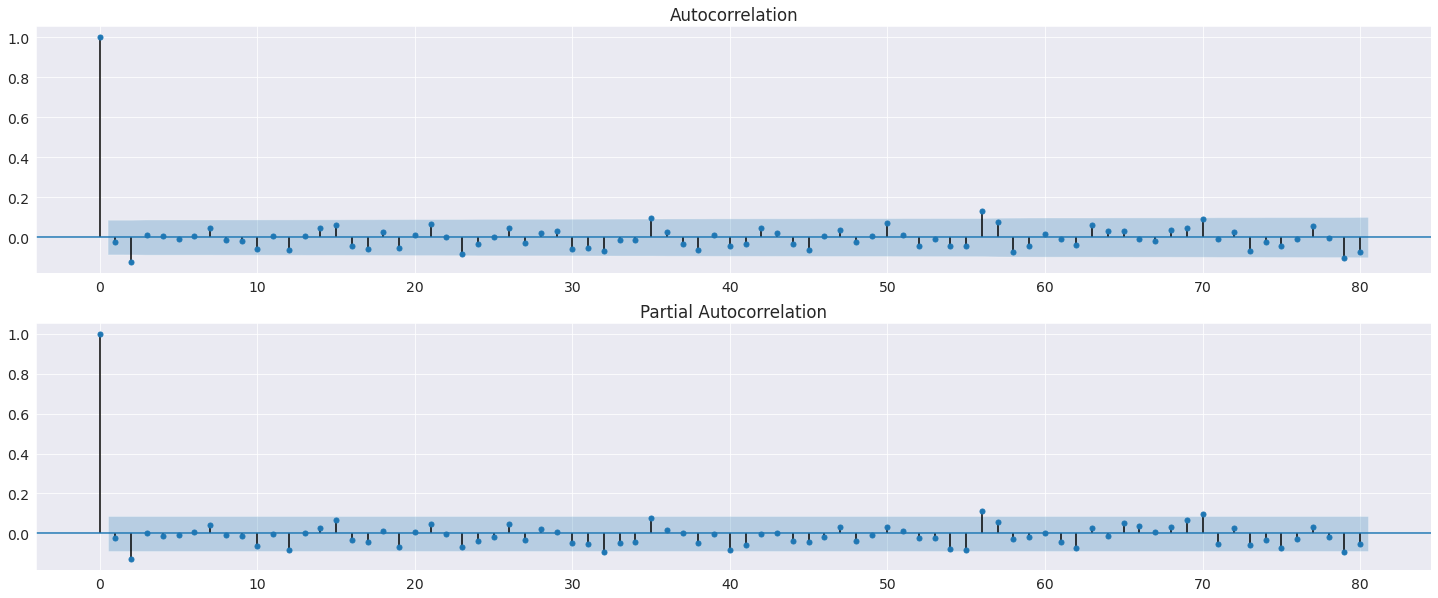

In [118]:
# Step 1: train ARIMA([3, 4],0,0)
arima_order_34_0_0 = sm.tsa.SARIMAX(endog=endog, order=[(3, 4,),0,0], exog=exogs).fit()
print(arima_order_34_0_0.summary())
plot_acf_pacf(arima_order_34_0_0, lags=80)

                                  SARIMAX Results                                   
Dep. Variable:            EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([2, 3, 4], 0, 0)   Log Likelihood               -4610.902
Date:                      Mon, 16 Jan 2023   AIC                           9235.804
Time:                              18:44:28   BIC                           9265.458
Sample:                          01-01-2013   HQIC                          9247.429
                               - 05-26-2014                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3915     13.832     -2.559      0.011     -62.502      -8.281
Saturday   -1349.8797    126.913    -10.636      0.000   -1598.624   -1101.135
Sund

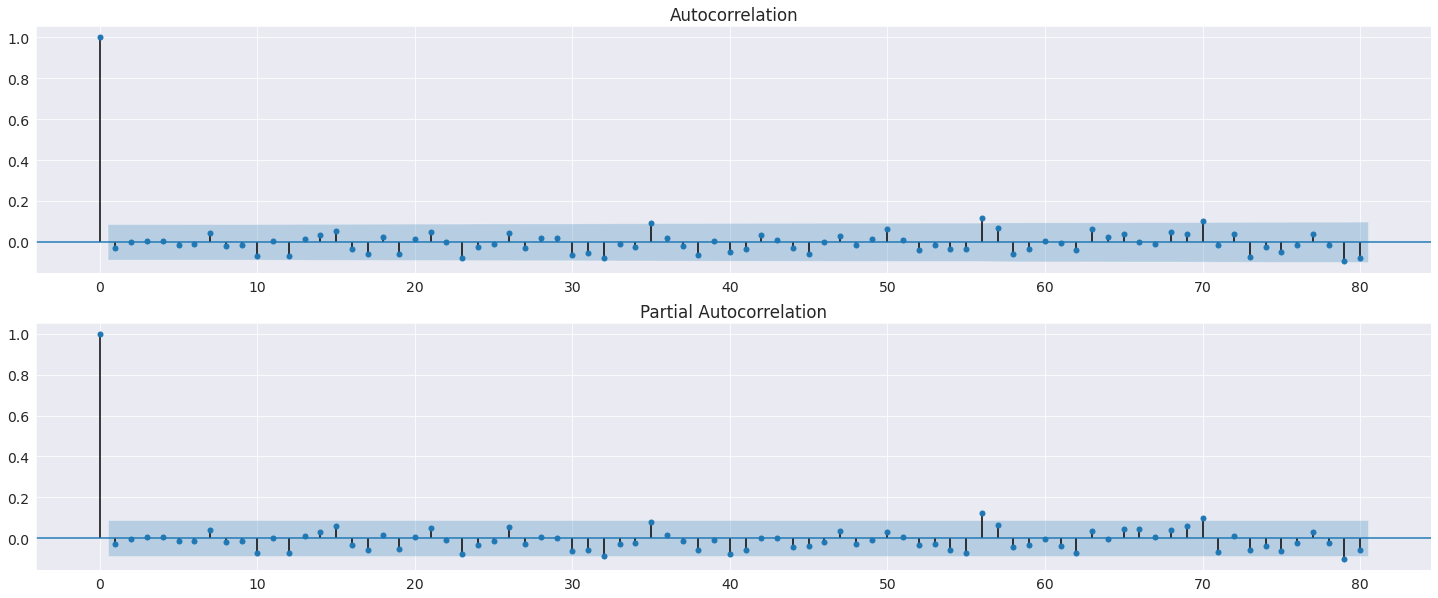

In [119]:
# Step 1: train ARIMA([2, 3, 4],0,0)
arima_order_234_0_0 = sm.tsa.SARIMAX(endog=endog, order=[(2, 3, 4,),0,0], exog=exogs).fit()
print(arima_order_234_0_0.summary())
plot_acf_pacf(arima_order_234_0_0, lags=80)

                                  SARIMAX Results                                  
Dep. Variable:           EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([2, 4], 0, [2])   Log Likelihood               -4612.800
Date:                     Mon, 16 Jan 2023   AIC                           9239.600
Time:                             18:44:32   BIC                           9269.255
Sample:                         01-01-2013   HQIC                          9251.226
                              - 05-26-2014                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3912     13.945     -2.538      0.011     -62.723      -8.059
Saturday   -1349.8790    132.840    -10.162      0.000   -1610.240   -1089.518
Sunday     -

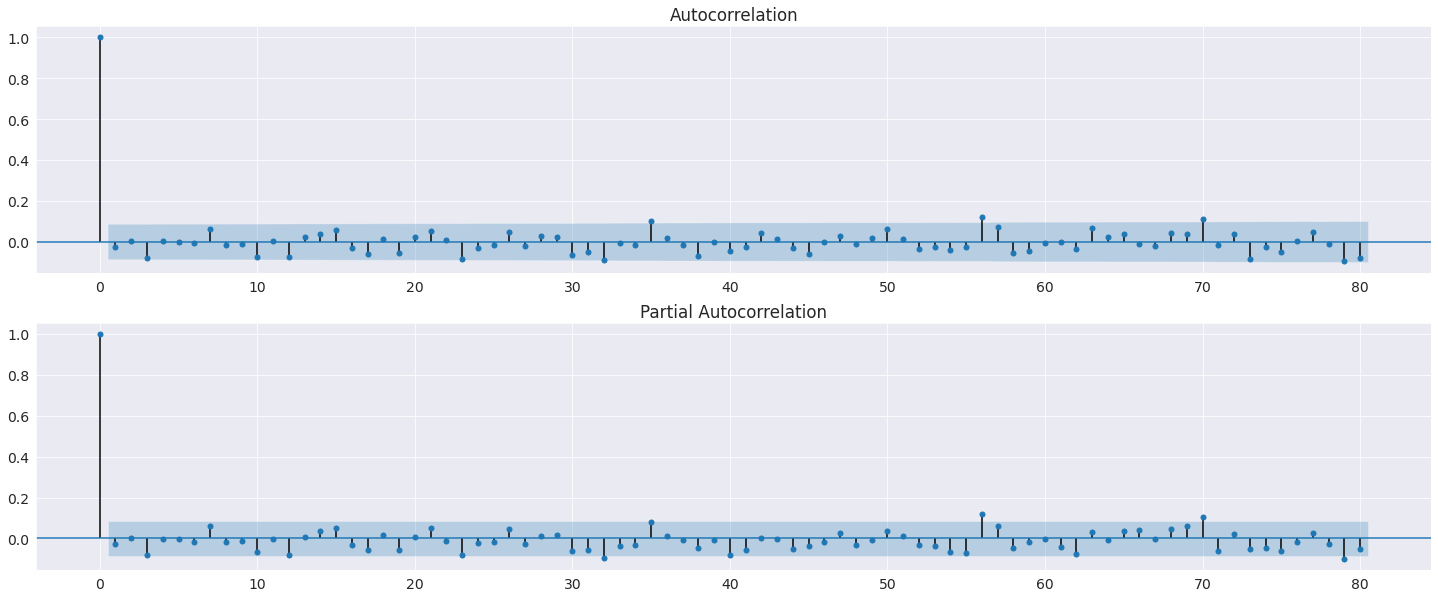

In [120]:
# Step 2: train ARIMA([2, 4],0,[2])
arima_order_24_0_2 = sm.tsa.SARIMAX(endog=endog, order=[(2, 4),0,(2,)], exog=exogs).fit()
print(arima_order_24_0_2.summary())
plot_acf_pacf(arima_order_24_0_2, lags=80)

                                  SARIMAX Results                                  
Dep. Variable:           EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([2, 4], 0, [3])   Log Likelihood               -4611.174
Date:                     Mon, 16 Jan 2023   AIC                           9236.347
Time:                             18:44:37   BIC                           9266.002
Sample:                         01-01-2013   HQIC                          9247.973
                              - 05-26-2014                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3915     13.996     -2.529      0.011     -62.823      -7.960
Saturday   -1349.8797    128.337    -10.518      0.000   -1601.416   -1098.343
Sunday     -

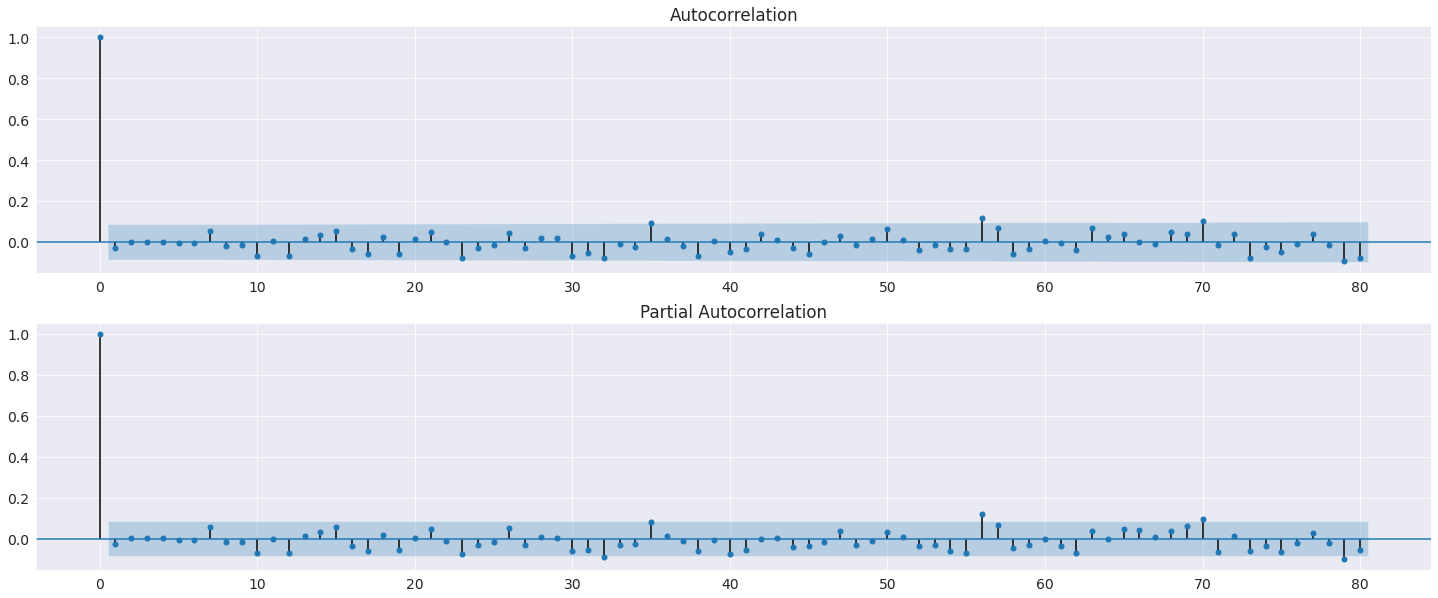

In [121]:
# Step 2: train ARIMA([2, 4],0,[3])
arima_order_24_0_3 = sm.tsa.SARIMAX(endog=endog, order=[(2,4),0,(3,)], exog=exogs).fit()
print(arima_order_24_0_3.summary())
plot_acf_pacf(arima_order_24_0_3, lags=80)

                                  SARIMAX Results                                  
Dep. Variable:           EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([2, 4], 0, [4])   Log Likelihood               -4613.012
Date:                     Mon, 16 Jan 2023   AIC                           9240.024
Time:                             18:44:41   BIC                           9269.678
Sample:                         01-01-2013   HQIC                          9251.649
                              - 05-26-2014                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3905     13.322     -2.657      0.008     -61.501      -9.280
Saturday   -1349.8772    119.401    -11.305      0.000   -1583.899   -1115.855
Sunday     -

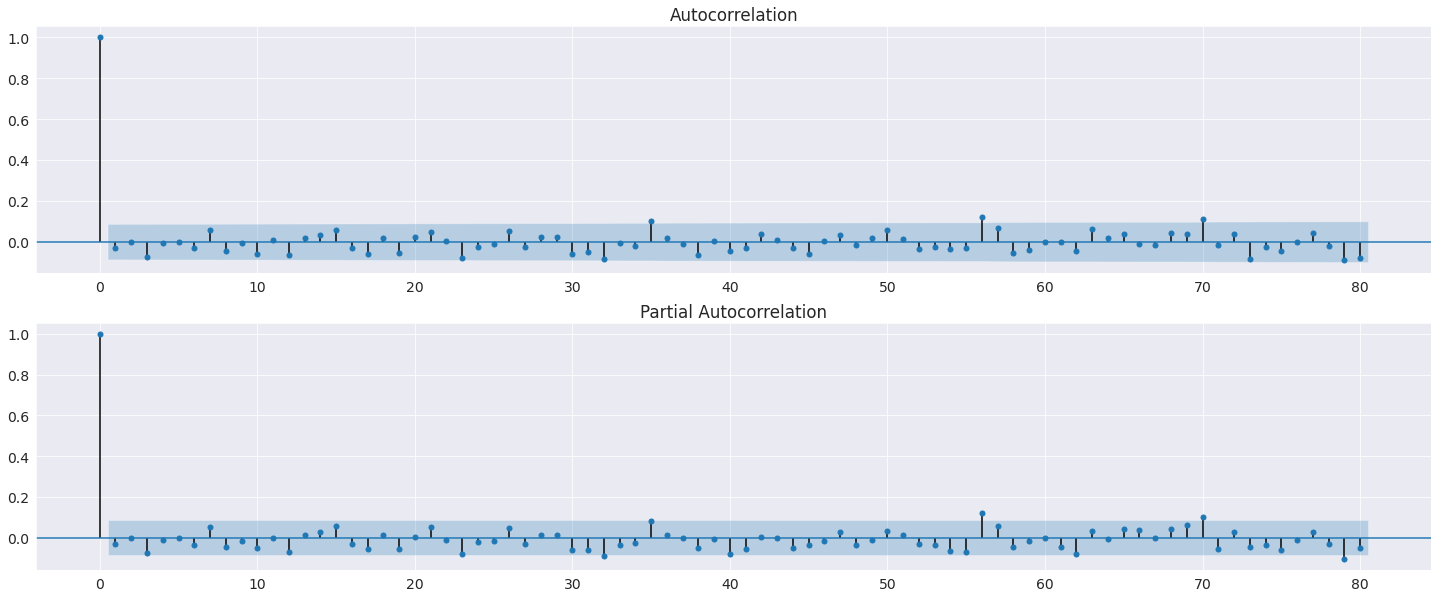

In [122]:
# Step 2: train ARIMA([2, 4],0,[4])
arima_order_24_0_4 = sm.tsa.SARIMAX(endog=endog, order=[(2,4),0,(4,)], exog=exogs).fit()
print(arima_order_24_0_4.summary())
plot_acf_pacf(arima_order_24_0_4, lags=80)

                                   SARIMAX Results                                    
Dep. Variable:              EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([2, 4], 0, [2, 3])   Log Likelihood               -4611.177
Date:                        Mon, 16 Jan 2023   AIC                           9238.354
Time:                                18:44:44   BIC                           9272.245
Sample:                            01-01-2013   HQIC                          9251.641
                                 - 05-26-2014                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3930     14.017     -2.525      0.012     -62.866      -7.920
Saturday   -1349.8794    133.609    -10.103      0.000   -1611.748 

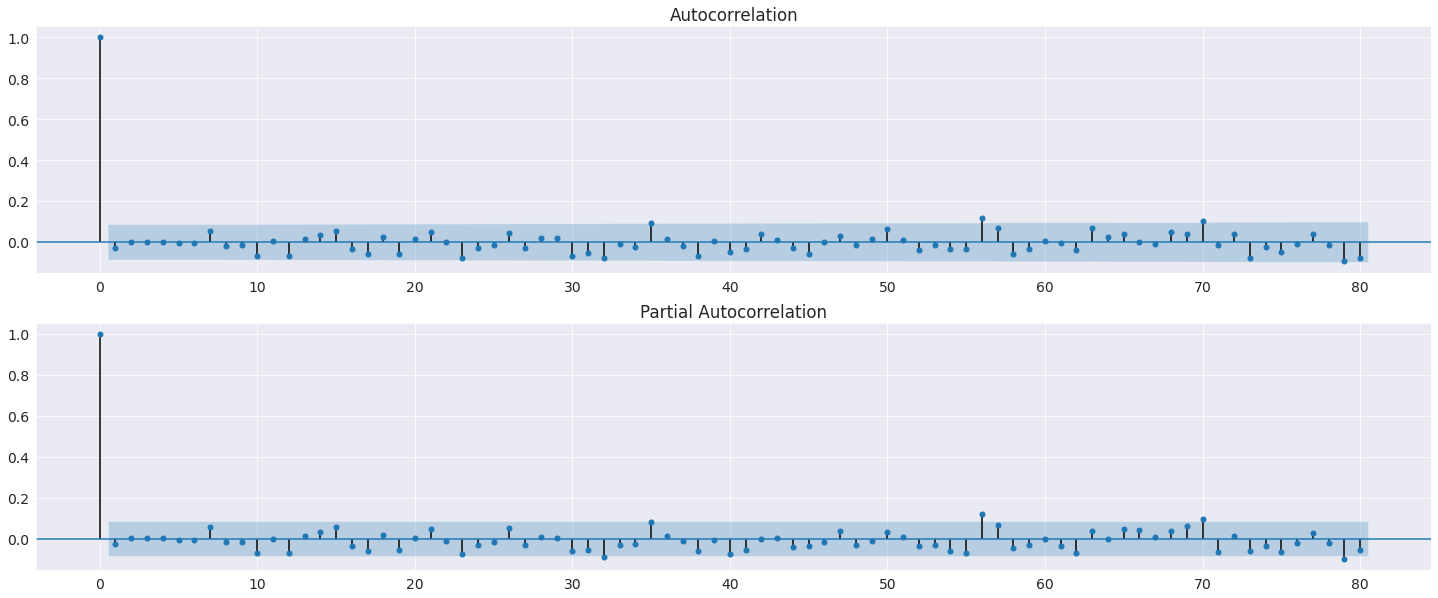

In [123]:
# Step 2: train ARIMA([2, 4],0,[2, 3])
arima_order_24_0_23 = sm.tsa.SARIMAX(endog=endog, order=[(2, 4),0,(2, 3)], exog=exogs).fit()
print(arima_order_24_0_23.summary())
plot_acf_pacf(arima_order_24_0_3, lags=80)

                                   SARIMAX Results                                    
Dep. Variable:              EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([2, 4], 0, [2, 4])   Log Likelihood               -4612.964
Date:                        Mon, 16 Jan 2023   AIC                           9241.928
Time:                                18:44:49   BIC                           9275.819
Sample:                            01-01-2013   HQIC                          9255.214
                                 - 05-26-2014                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3905     13.343     -2.652      0.008     -61.543      -9.238
Saturday   -1349.8768    125.948    -10.718      0.000   -1596.731 

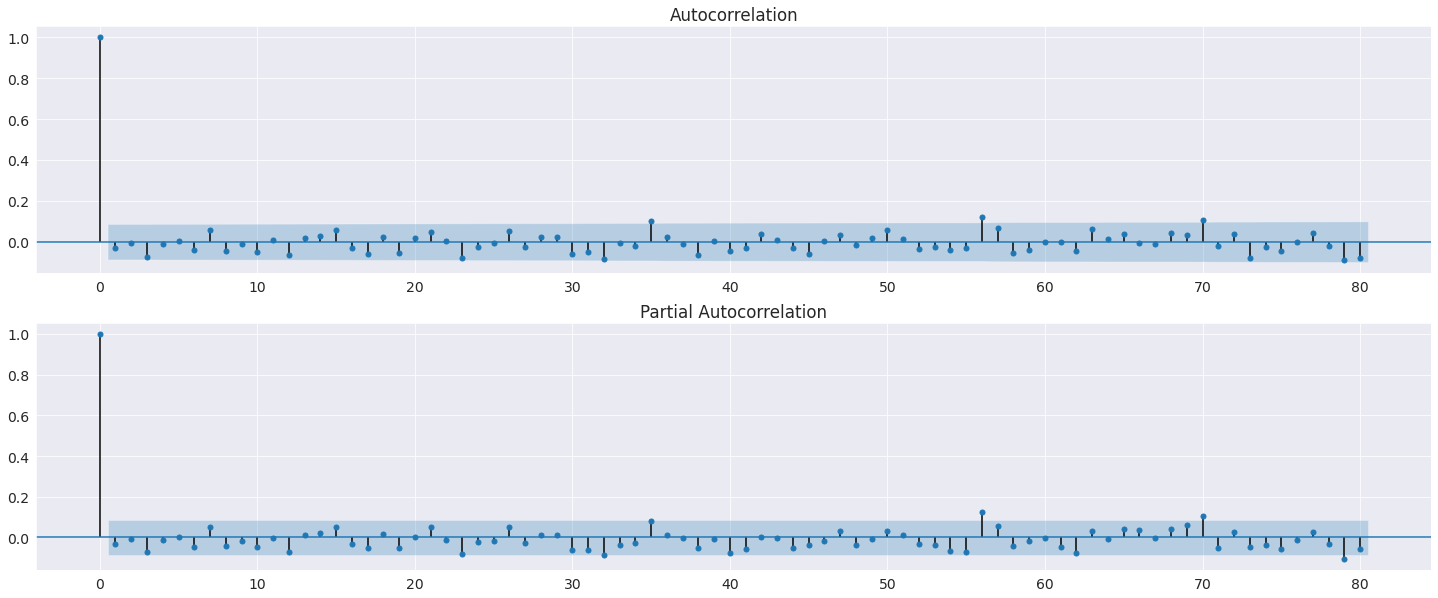

In [124]:
# Step 2: train ARIMA([2, 4],0,[2, 4])
arima_order_24_0_24 = sm.tsa.SARIMAX(endog=endog, order=[(2,4),0,(2, 4)], exog=exogs).fit()
print(arima_order_24_0_24.summary())
plot_acf_pacf(arima_order_24_0_24, lags=80)

                                   SARIMAX Results                                    
Dep. Variable:              EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([2, 4], 0, [3, 4])   Log Likelihood               -4611.011
Date:                        Mon, 16 Jan 2023   AIC                           9238.021
Time:                                18:44:53   BIC                           9271.912
Sample:                            01-01-2013   HQIC                          9251.307
                                 - 05-26-2014                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3943     13.307     -2.660      0.008     -61.475      -9.313
Saturday   -1349.8789    120.873    -11.168      0.000   -1586.785 

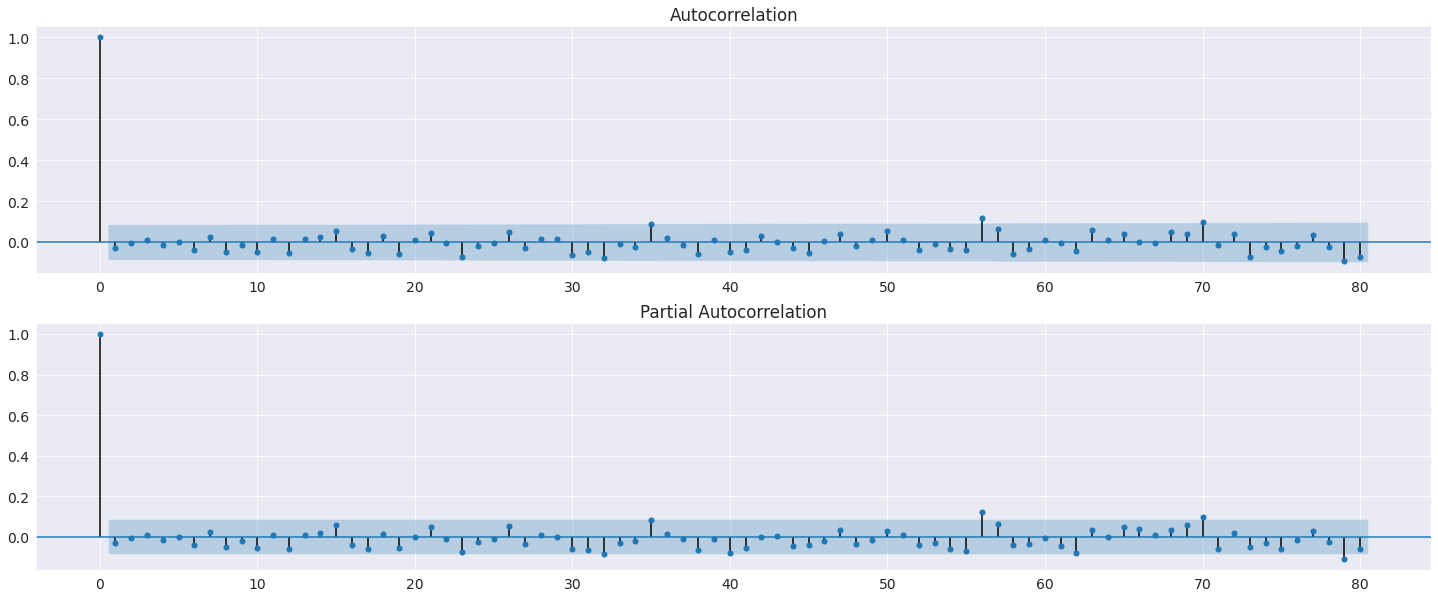

In [125]:
# Step 2: train ARIMA([2, 4],0,[3, 4])
arima_order_24_0_34 = sm.tsa.SARIMAX(endog=endog, order=[(2,4),0,(3, 4)], exog=exogs).fit()
print(arima_order_24_0_34.summary())
plot_acf_pacf(arima_order_24_0_34, lags=80)

                                     SARIMAX Results                                     
Dep. Variable:                 EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([2, 4], 0, [2, 3, 4])   Log Likelihood               -4610.907
Date:                           Mon, 16 Jan 2023   AIC                           9239.813
Time:                                   18:44:57   BIC                           9277.941
Sample:                               01-01-2013   HQIC                          9254.761
                                    - 05-26-2014                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3972     13.385     -2.645      0.008     -61.631      -9.164
Saturday   -1349.8782    124.476    -10.845

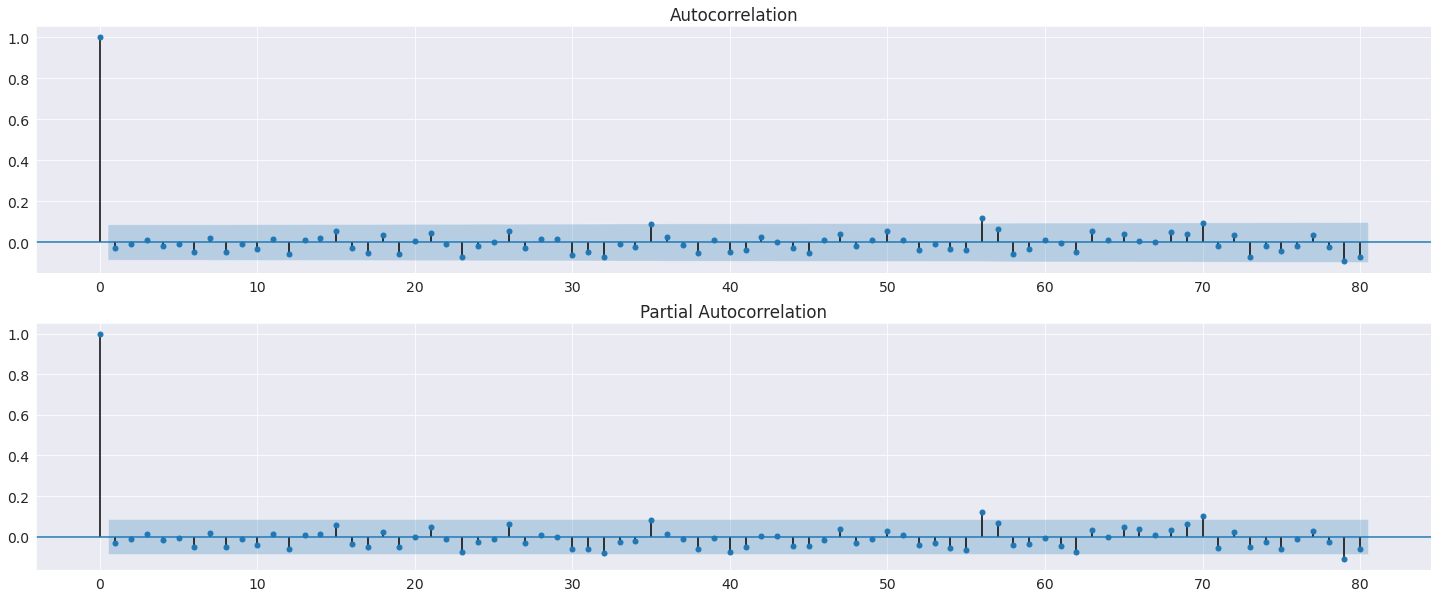

In [126]:
# Step 2: train ARIMA([2, 4],0,[2, 3, 4])
arima_order_24_0_234 = sm.tsa.SARIMAX(endog=endog, order=[(2, 4),0,(2, 3, 4)], exog=exogs).fit()
print(arima_order_24_0_234.summary())
plot_acf_pacf(arima_order_24_0_234, lags=80)

The model ARIMA([2, 4],0,[3]) seems to be the best one in terms of excluding / reducing significant correlations on ACF / PACF plots.

In [127]:
arima_best = arima_order_24_0_3

Analyse the residuals

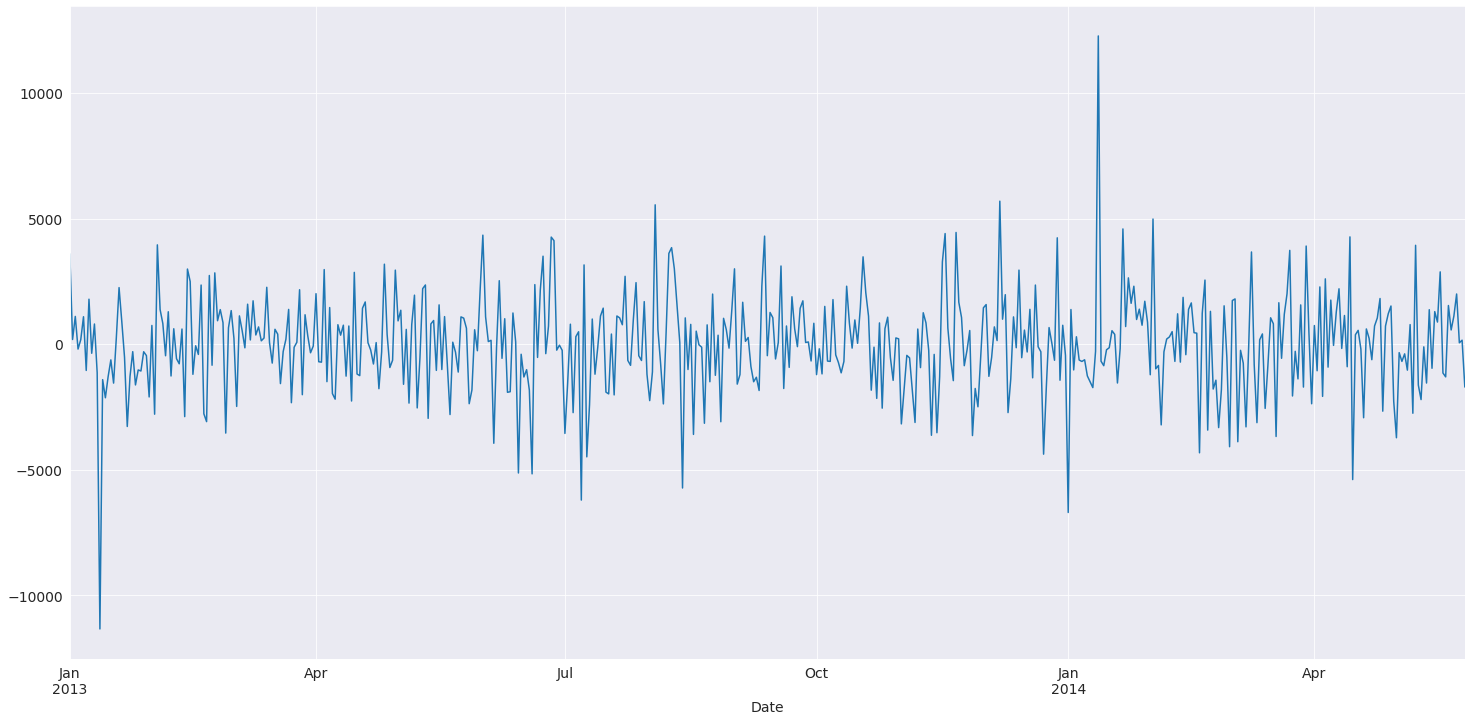

In [128]:
arima_best.resid.plot(figsize=[25,12])
plt.plot();

In [129]:
# Augmented Dickey-Fuller unit root test: 
df_stat = stattools.adfuller(arima_best.resid.values)
print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ncritical values: %s' % 
      (df_stat[0], df_stat[1], df_stat[2], df_stat[4]))

The Augmented Dickey-Fuller test statistic -23.239847, 
pvalue: 0.00 
maximal Lag: 0 
critical values: {'1%': -3.4432372923913124, '5%': -2.86722383510113, '10%': -2.5697972702806613}


In [130]:
# Kwiatkowski–Phillips–Schmidt–Shin
kpss_stat= stattools.kpss(arima_best.resid.values)
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.053276, 
pvalue: 0.10 
maximal Lag: 19 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


Both tests show that the residuals are stationary.

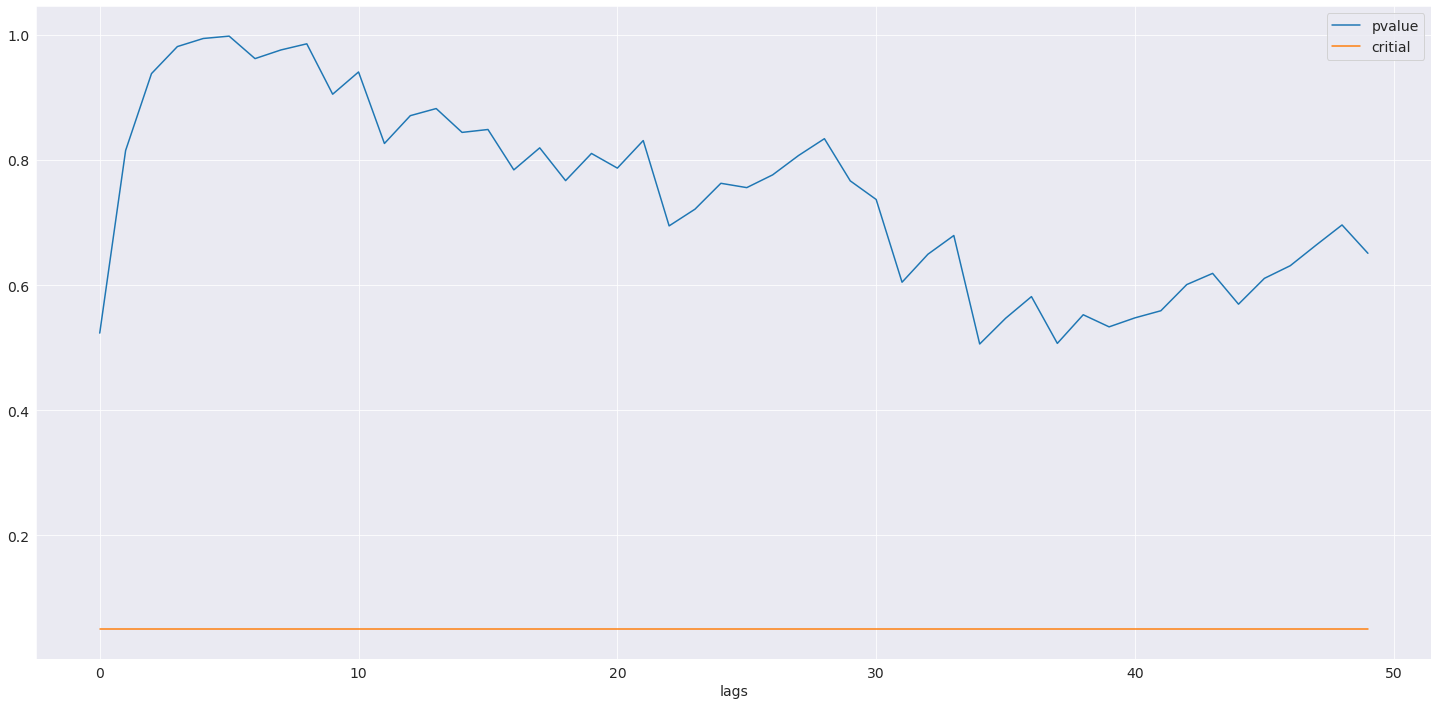

In [131]:
# Ljung-Box test
# H0: residuals are not autocorrelated (https://www.statisticshowto.com/ljung-box-test/)
nlags = 50
pd.DataFrame({
    'lags': range(nlags),
    'pvalue': sm.stats.diagnostic.acorr_ljungbox(arima_best.resid.values, lags=nlags)[1], 
    'critial': np.array([0.05]*nlags)
}).set_index('lags').plot(figsize=[25,12])
plt.show()

In [133]:
# Durbin-Watson statistic
# H0: residuals are not autocorrelated (https://www.statisticshowto.com/durbin-watson-test-coefficient/)
# Must be close or equal to 2
sm.stats.durbin_watson(arima_best.resid.values)

2.0485736642838512

Ljung-Box test is not significant for first 50 lags so we can consider the residuals to be not autocorrelated. It is also confirmed by Durbin-Watson statistic which is very close to 2.

In [134]:
# Wilcoxon test
# H0: residuals are unbiased (https://www.statisticshowto.com/wilcoxon-signed-rank-test)
stat, p = stats.wilcoxon(arima_best.resid.values)
print('Statistic: %f\npvalue: %.2f' %(stat, p))

Statistic: 64958.000000
pvalue: 0.89


Wilcoxon test is not significant so we can consider the residuals to be unbiased.

NormaltestResult(statistic=58.719169050724425, pvalue=1.7753927810754727e-13)


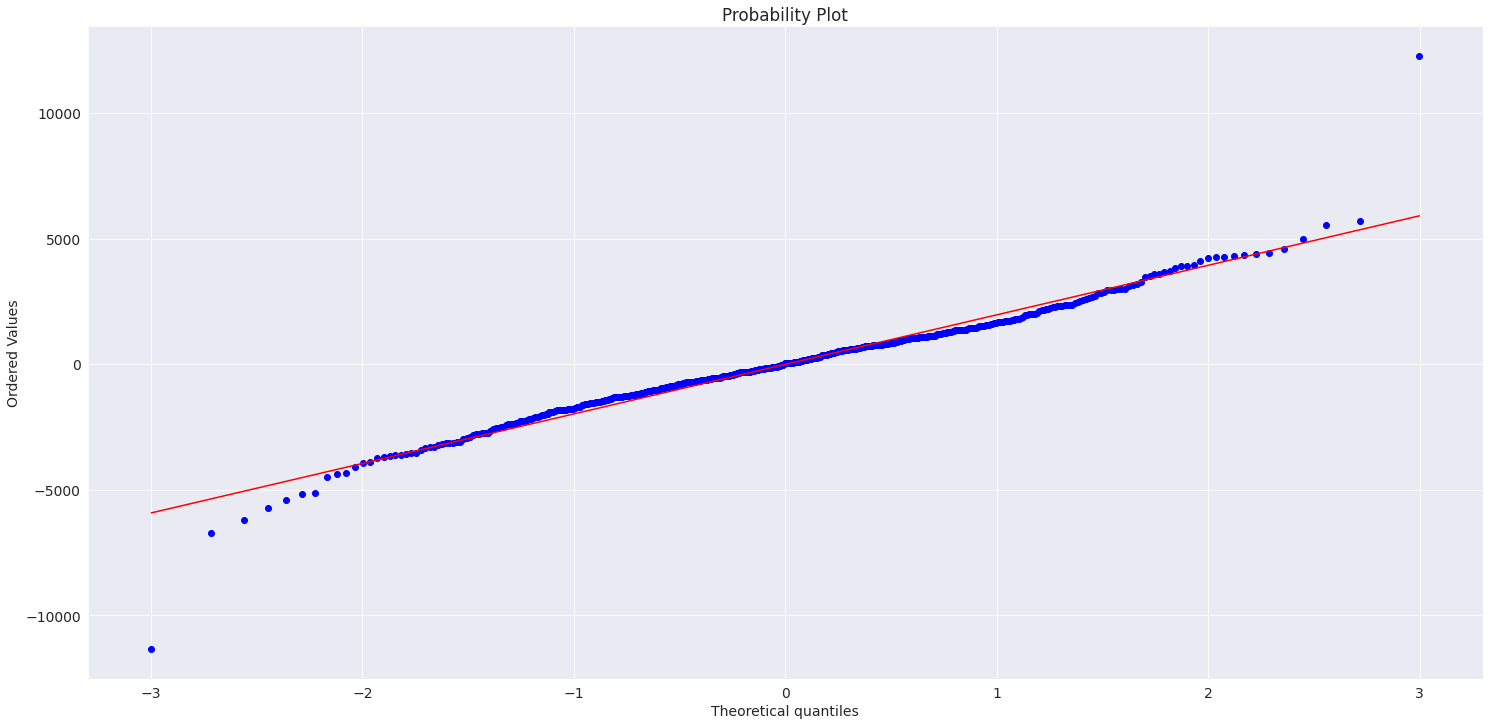

In [135]:
# Normaliry test
# H0: residuals are normally distributed
print(stats.normaltest(arima_best.resid))

plt.figure(figsize=[25,12])
res = stats.probplot(arima_best.resid, dist="norm", plot = plt)

Both normality test and Q-Q plot show that the residuals are not normally distributed.

                                  SARIMAX Results                                  
Dep. Variable:           EnergyConsumption   No. Observations:                  512
Model:             SARIMAX([2, 4], 1, [3])   Log Likelihood               -4611.650
Date:                     Mon, 16 Jan 2023   AIC                           9237.299
Time:                             18:50:35   BIC                           9266.954
Sample:                         12-31-2012   HQIC                          9248.925
                              - 05-26-2014                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Saturday   -1349.8797    128.275    -10.523      0.000   -1601.294   -1098.465
Sunday     -1694.3001    136.017    -12.457      0.000   -1960.888   -1427.712
Temp1       

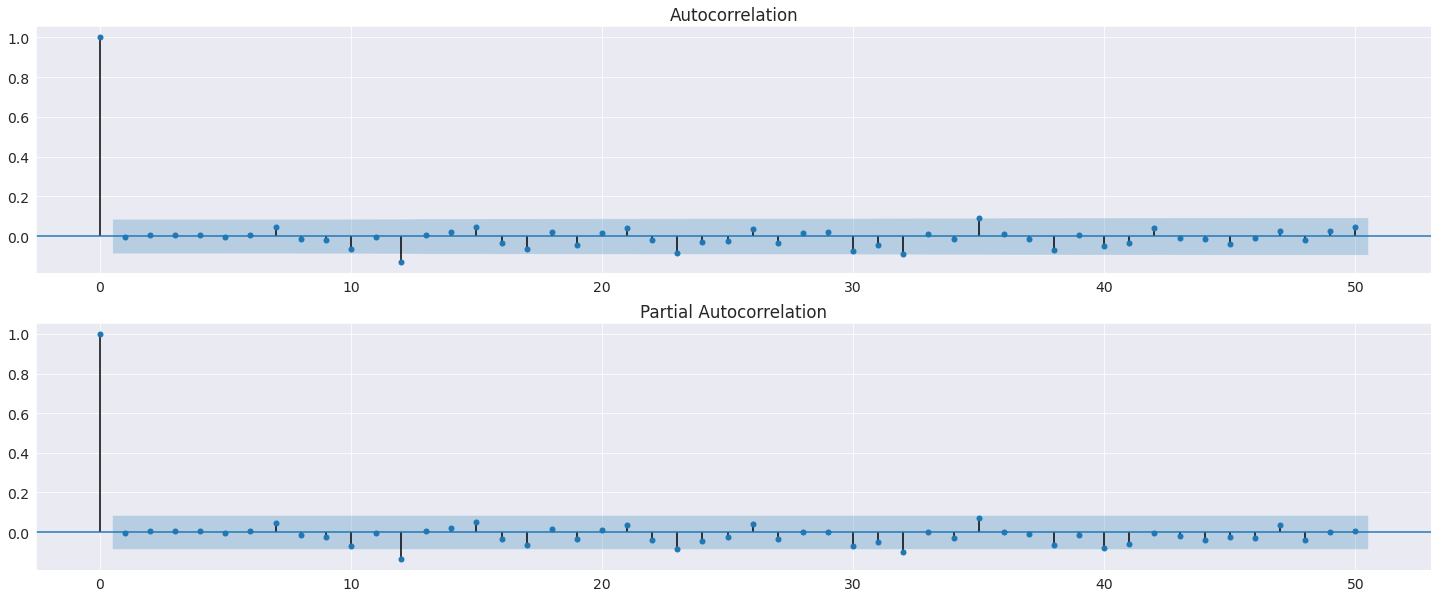

In [137]:
# Rebuild best model excluding insignificant regressors
# Use data differentiated w.r.t. yearly seasonality as SARIMAX can handle only 1 period
ts_sdiff_1 = ts_sdiff[:-len(ts2)]
endog = ts_sdiff_1['EnergyConsumption']
exogs = ts_sdiff_1[['Saturday', 'Sunday', 'Temp1']]
arima_best = sm.tsa.SARIMAX(endog=endog, order=[(2,4),1,(3,)], exog=exogs).fit()
print(arima_best.summary())
plot_acf_pacf(arima_best, lags=50)

In [138]:
# Predict
ts_pred = arima_best.get_prediction()
ts_pred_ci = ts_pred.conf_int()

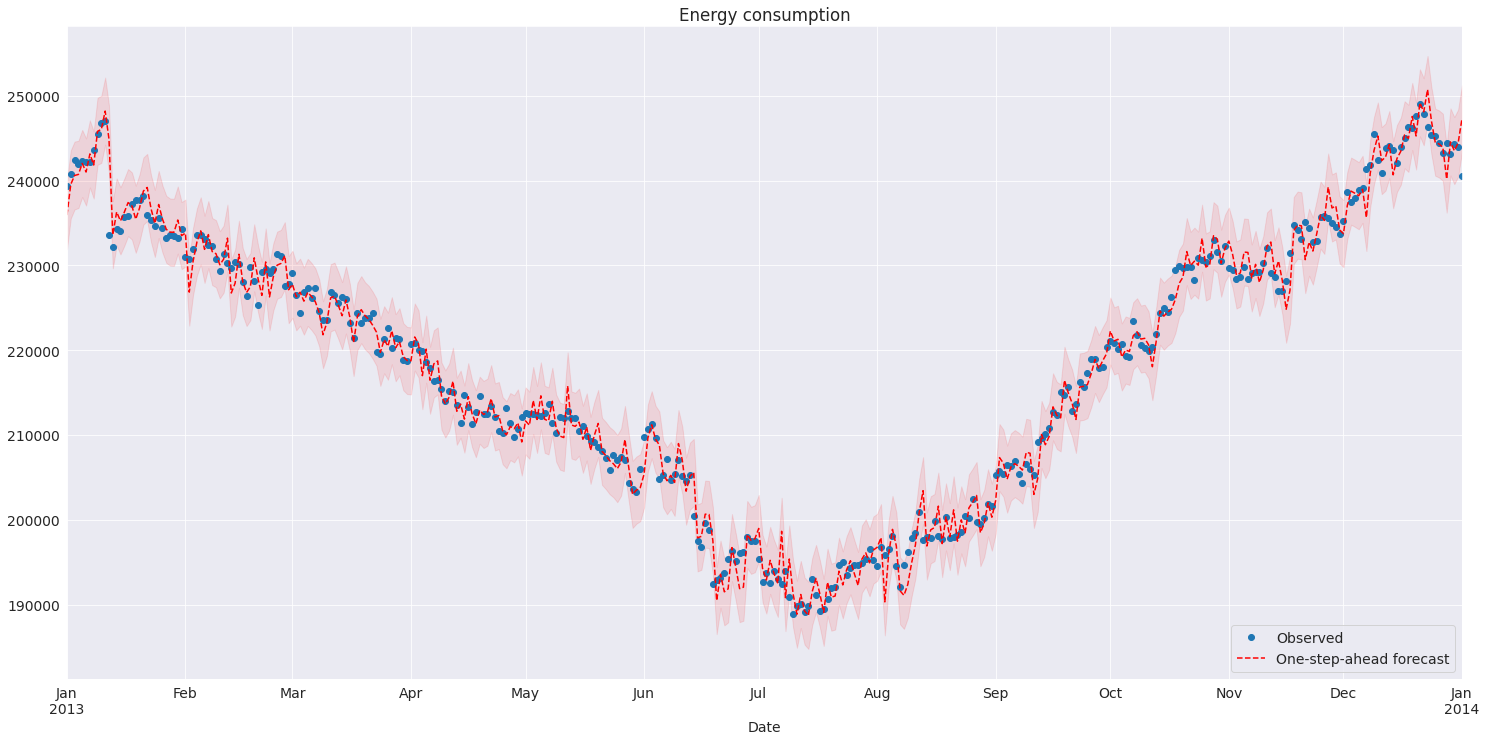

In [139]:
# Graph
fig, ax = plt.subplots(figsize=[25,12])
npre = 4
ax.set(title='Energy consumption', xlabel='Date')

start = '2013-01-01'
end = '2014-01-01'

# Plot data points
ts1.loc[start:end]['EnergyConsumption'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
ts_pred_int = ts_pred.predicted_mean + ts1.shift(365)['EnergyConsumption']
ts_pred_int[start:end].plot(ax=ax, style='r--', label='One-step-ahead forecast')

ci_low = (ts_pred_ci.loc[:,ts_pred_ci.columns[0]] + ts1.shift(365)['EnergyConsumption']).loc[start:end]
ci_high = (ts_pred_ci.loc[:,ts_pred_ci.columns[1]] + ts1.shift(365)['EnergyConsumption']).loc[start:end]
ax.fill_between(ci_low.index, ci_low, ci_high, color='r', alpha=0.1)

legend = ax.legend(loc='lower right')

In [140]:
# Build forecast
ts_sdiff_2 = ts_sdiff[-len(ts2):]
exogs = ts_sdiff_2[['Saturday', 'Sunday', 'Temp1']]
ts_frc = arima_best.forecast(steps=len(ts_sdiff_2), exog=exogs)
ts_frc_int = (ts_frc + ts.shift(365)['EnergyConsumption']).iloc[-len(ts2):]

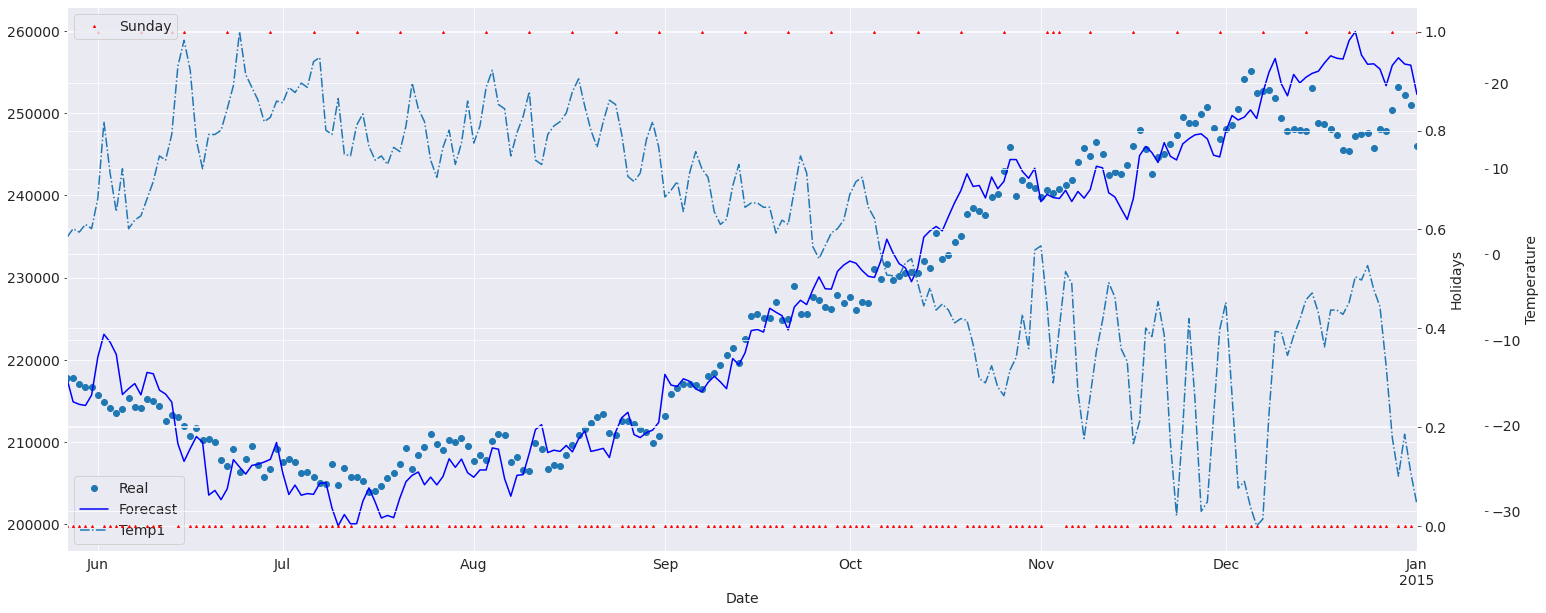

In [141]:
# Plot the TS together with independent variables
fig, ax = plt.subplots(figsize=[30,10])
ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
ax3.set_ylabel('Temperature')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

ts2['EnergyConsumption'].plot(ax = ax,  style='o', label='Real')
ts_frc_int.plot(ax = ax,  style='b-', label='Forecast')
ts2[['Sunday']].plot(ax = ax2, style='r', marker = '^', markersize = 2.0, linewidth=0.0)

for col in exogs.columns:
    if col.startswith('Temp'):
        style = '--' if col.endswith('Less') else '-.'
        ts2[col].plot(ax = ax3,  style=style)

lines = ax.get_lines() + ax3.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='lower left', ncol=1)
ax2.legend(loc='upper left')
plt.show()

In [142]:
def qualityMAPE(x,y):
    # Mean absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = ((x-y).abs()/x.abs()).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , qlt

In [143]:
# MAPE for the whole forecasting period
qualityMAPE(ts2['EnergyConsumption'], ts_frc_int)[0]

0.013049483867253723

In [144]:
# MAPE for the last 3 months of the forecasting period
qualityMAPE(ts2['EnergyConsumption'][:'2014-09'], ts_frc_int[:'2015-01'])[0]

0.011383657581647185

The forecast looks appropriate.

<h2 align="center">2. Find the best ARIMA Model automatically (30%) </h2>

* 0) define candidates for $p, d, q, P, D, Q$ values  
* 1) Run grid search for ARIMA parameters (use ts1 from the previous section) according to AIC|BIC|HQIC, feel free to use your own approach how to define the best model based on AIC|BIC|HQIC. How many time does it take to fit all ARIMA?
* 2) Run Residuals and Coefficint analysis for the best model
  - If all tests fail you need to rebuild automatically selected model (you can do it manually).
  - if there are some insignificant regressors that can be eliminated, please exclude them from the model.
* 3) build forecast for the ts2 (you need to transform exogenous variables if you applied Box-Cox tranformations in step 1); plot this forecast on the same plot with original ts2 data
* 4) Calculate loss MAPE of your forecast. Which model manually generated or automatically generated is better?

In [210]:
import itertools

# define candidates for  𝑝,𝑑,𝑞  values. PDQ not needed.

p_arr = list(itertools.combinations(range(2,5), 1)) + list(itertools.combinations(range(2,5), 2)) + list(itertools.combinations(range(2,5), 3))
d = 1
q_arr = list(itertools.combinations(range(2,5), 1)) + list(itertools.combinations(range(2,5), 2)) + list(itertools.combinations(range(2,5), 3))

In [237]:
print("Count fit all Arima: ", len(p_arr) * len(q_arr))

Count fit all Arima:  49


                                     SARIMAX Results                                     
Dep. Variable:                 EnergyConsumption   No. Observations:                  512
Model:             SARIMAX([2, 3], 1, [2, 3, 4])   Log Likelihood                 -33.263
Date:                           Mon, 16 Jan 2023   AIC                             84.526
Time:                                   20:48:59   BIC                            122.653
Sample:                               12-31-2012   HQIC                            99.473
                                    - 05-26-2014                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Saturday   -1349.8800   1.27e-08  -1.06e+11      0.000   -1349.880   -1349.880
Sunday     -1694.3016   1.01e-08  -1.67e+11

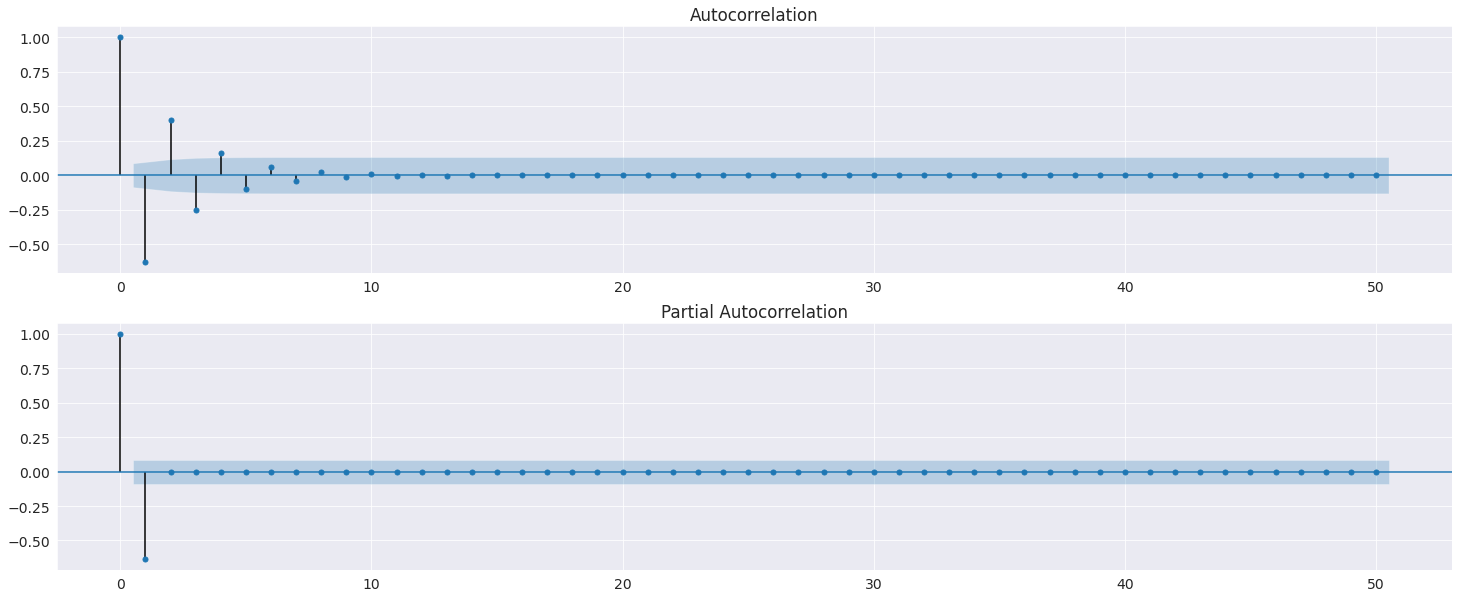

In [211]:
# Grid search of the optimal arima model by minimal AIC value 
min_aic = np.inf
arima_opt_aic = None

count = 0

for p in p_arr:
  for q in q_arr:
    ts_sdiff_1 = ts_sdiff[:-len(ts2)]
    endog = ts_sdiff_1['EnergyConsumption']
    exogs = ts_sdiff_1[['Saturday', 'Sunday', 'Temp1']]

    arima_best = sm.tsa.SARIMAX(endog=endog, order=[p, d, q], exog=exogs).fit()
    if arima_best.aic < min_aic:
      min_aic = arima_best.aic
      arima_opt_aic = arima_best


print(arima_opt_aic.summary())
plot_acf_pacf(arima_opt_aic, lags=50)

exclude insignificant regressors: ar.L2, ma.L3, ma.L4

                                SARIMAX Results                                 
Dep. Variable:        EnergyConsumption   No. Observations:                  512
Model:             SARIMAX([3], 1, [2])   Log Likelihood               -4616.314
Date:                  Mon, 16 Jan 2023   AIC                           9244.629
Time:                          20:52:03   BIC                           9270.047
Sample:                      12-31-2012   HQIC                          9254.593
                           - 05-26-2014                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Saturday   -1349.8797    133.038    -10.147      0.000   -1610.630   -1089.130
Sunday     -1694.3001    143.022    -11.846      0.000   -1974.617   -1413.983
Temp1        -35.3915     14.093    

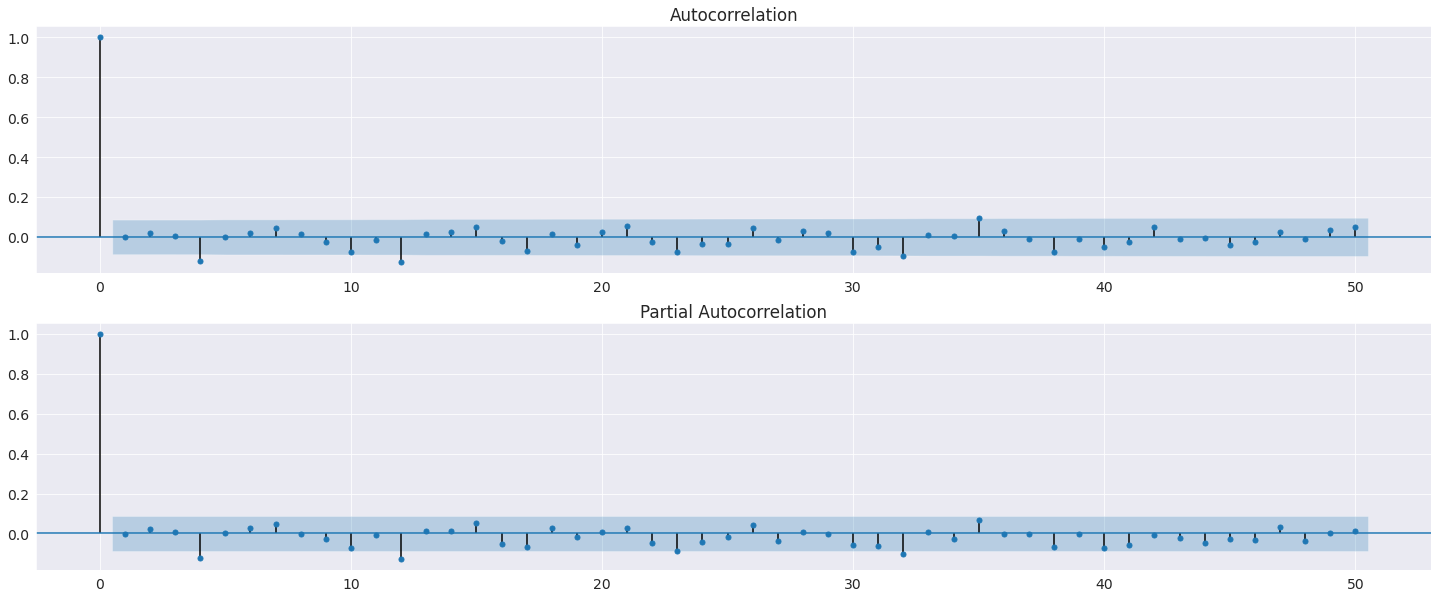

In [214]:
arima_best_aic = sm.tsa.SARIMAX(endog=endog, order=[(3, ), d, (2, )], exog=exogs).fit()
print(arima_best_aic.summary())
plot_acf_pacf(arima_best_aic, lags=50)

[]

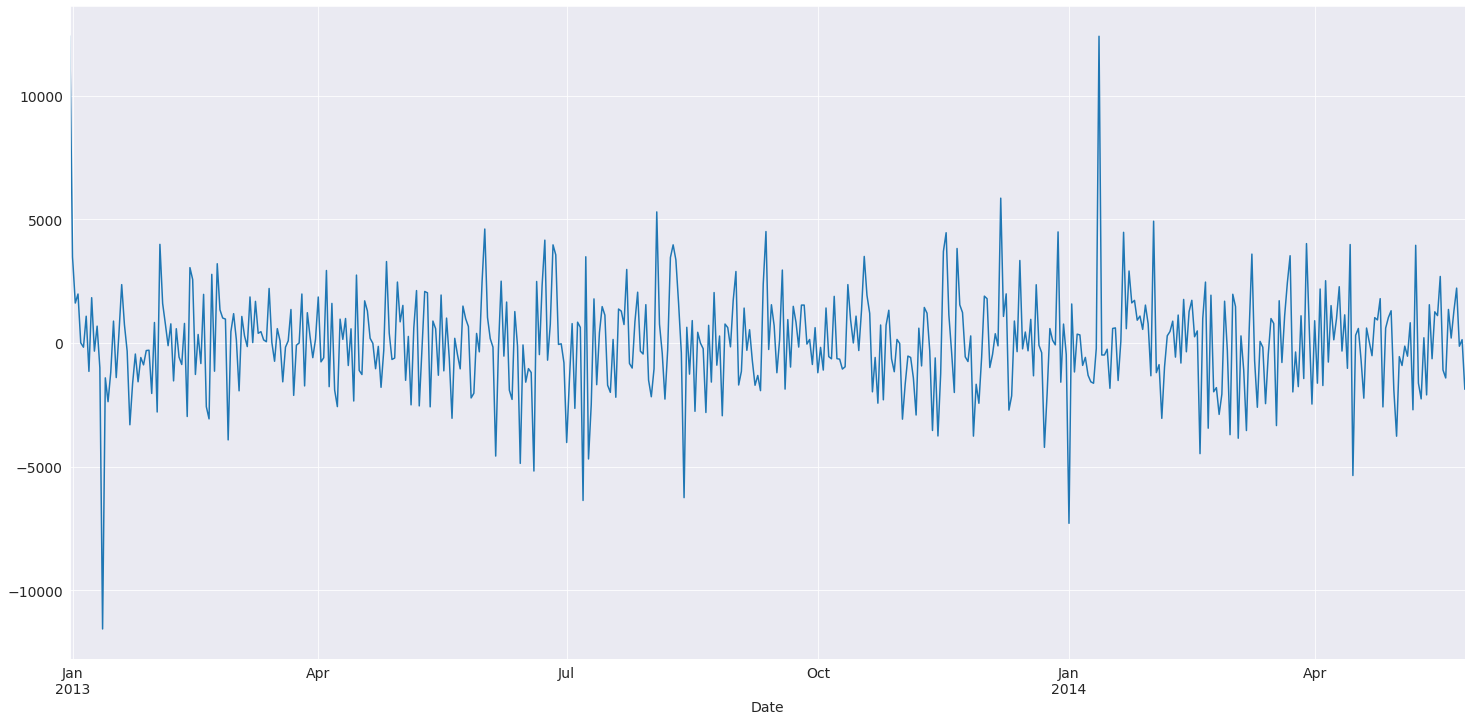

In [215]:
arima_best_aic.resid.plot(figsize=[25,12])
plt.plot()

In [216]:
# Augmented Dickey-Fuller unit root test: 
df_stat = stattools.adfuller(arima_best_aic.resid.values)
print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ncritical values: %s' % 
      (df_stat[0], df_stat[1], df_stat[2], df_stat[4]))

The Augmented Dickey-Fuller test statistic -12.999870, 
pvalue: 0.00 
maximal Lag: 3 
critical values: {'1%': -3.44328828958775, '5%': -2.8672462791357867, '10%': -2.569809231353463}


In [217]:
# Kwiatkowski–Phillips–Schmidt–Shin
kpss_stat= stattools.kpss(arima_best_aic.resid.values)
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.024028, 
pvalue: 0.10 
maximal Lag: 19 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


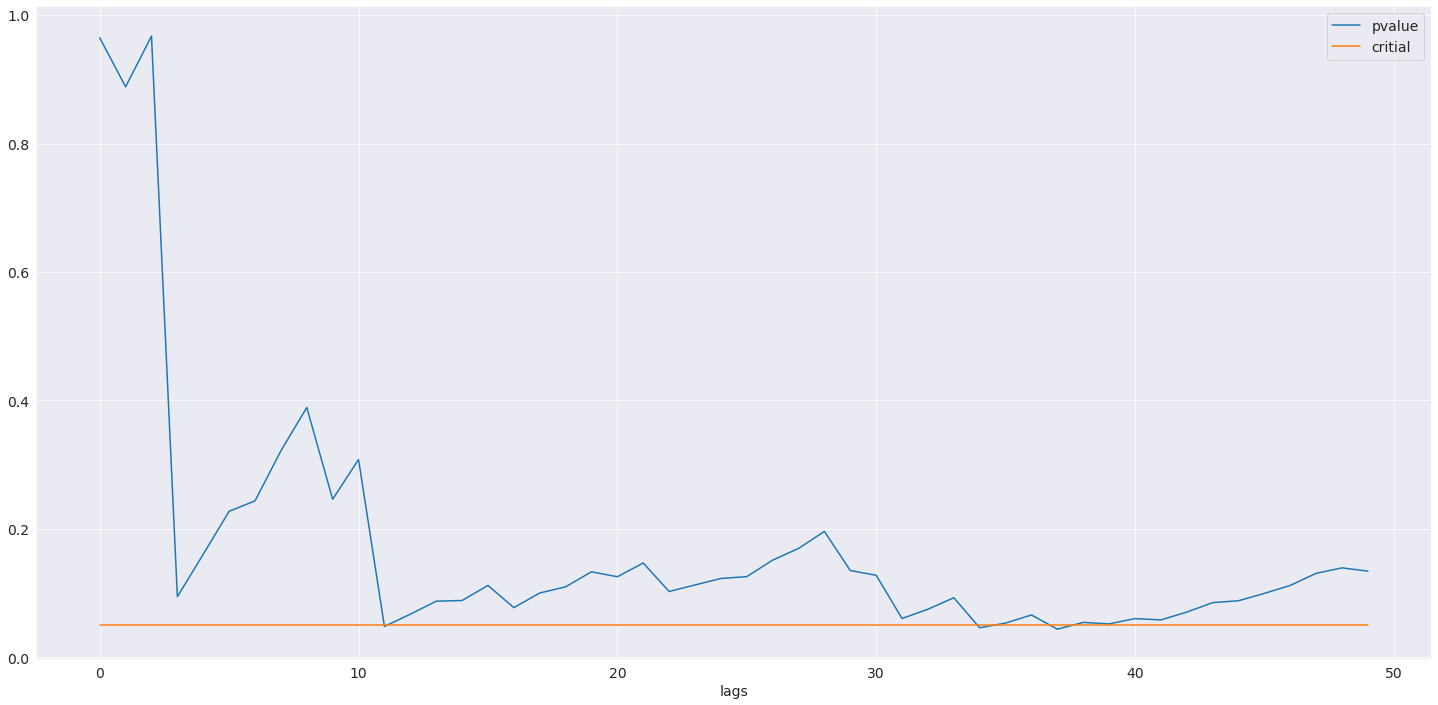

In [218]:
# Ljung-Box test
# H0: residuals are not autocorrelated (https://www.statisticshowto.com/ljung-box-test/)
nlags = 50
pd.DataFrame({
    'lags': range(nlags),
    'pvalue': sm.stats.diagnostic.acorr_ljungbox(arima_best_aic.resid.values, lags=nlags)[1], 
    'critial': np.array([0.05]*nlags)
}).set_index('lags').plot(figsize=[25,12])
plt.show()

In [219]:
# Durbin-Watson statistic
# H0: residuals are not autocorrelated (https://www.statisticshowto.com/durbin-watson-test-coefficient/)
# Must be close or equal to 2
sm.stats.durbin_watson(arima_best_aic.resid.values)

1.933908043570103

In [222]:
# Wilcoxon test
# H0: residuals are unbiased (https://www.statisticshowto.com/wilcoxon-signed-rank-test)
stat, p = stats.wilcoxon(arima_best_aic.resid.values)
print('Statistic: %f\npvalue: %.2f' %(stat, p))

Statistic: 64883.000000
pvalue: 0.82


NormaltestResult(statistic=83.01671350564564, pvalue=9.400473064911416e-19)


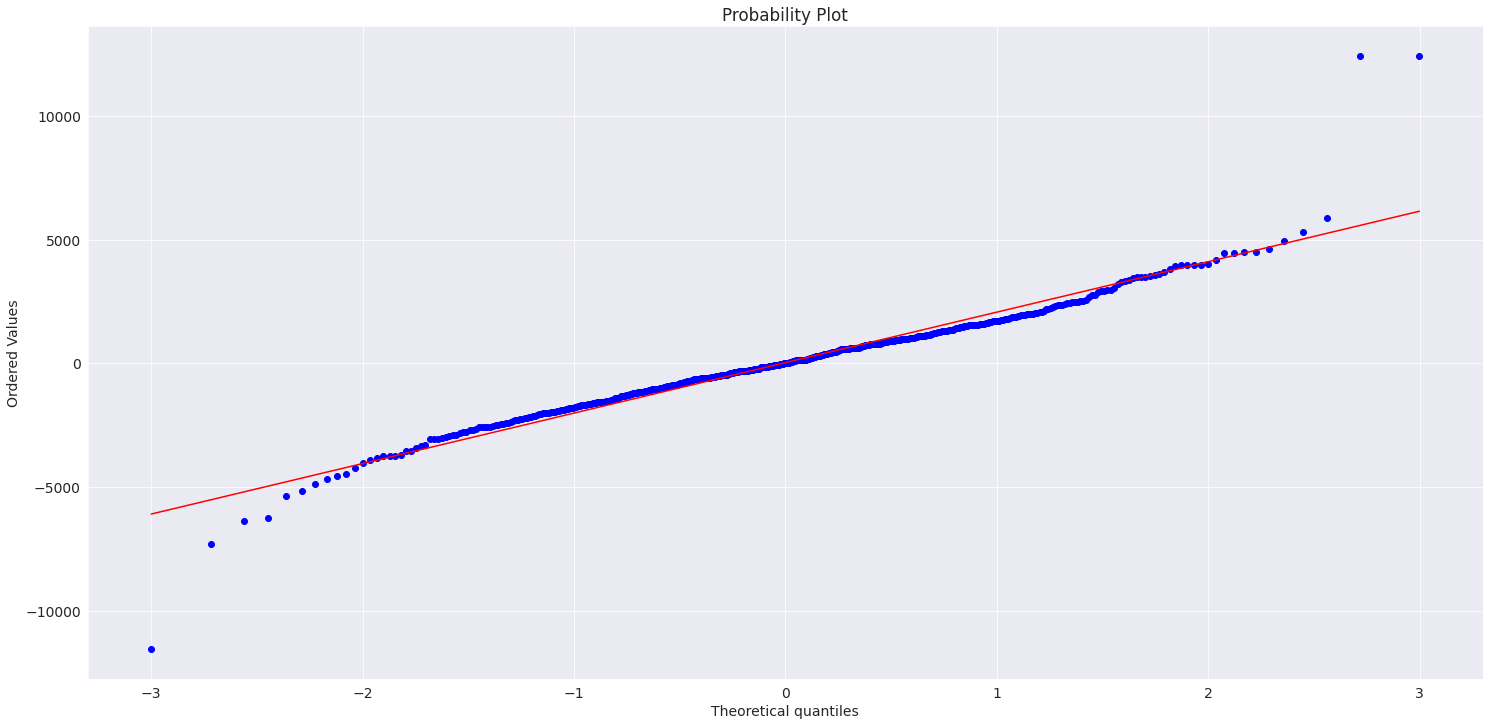

In [223]:
# Normaliry test
# H0: residuals are normally distributed
print(stats.normaltest(arima_best_aic.resid))

plt.figure(figsize=[25,12])
res = stats.probplot(arima_best_aic.resid, dist="norm", plot = plt)

In [224]:
# Predict
ts_pred = arima_best_aic.get_prediction()
ts_pred_ci = ts_pred.conf_int()

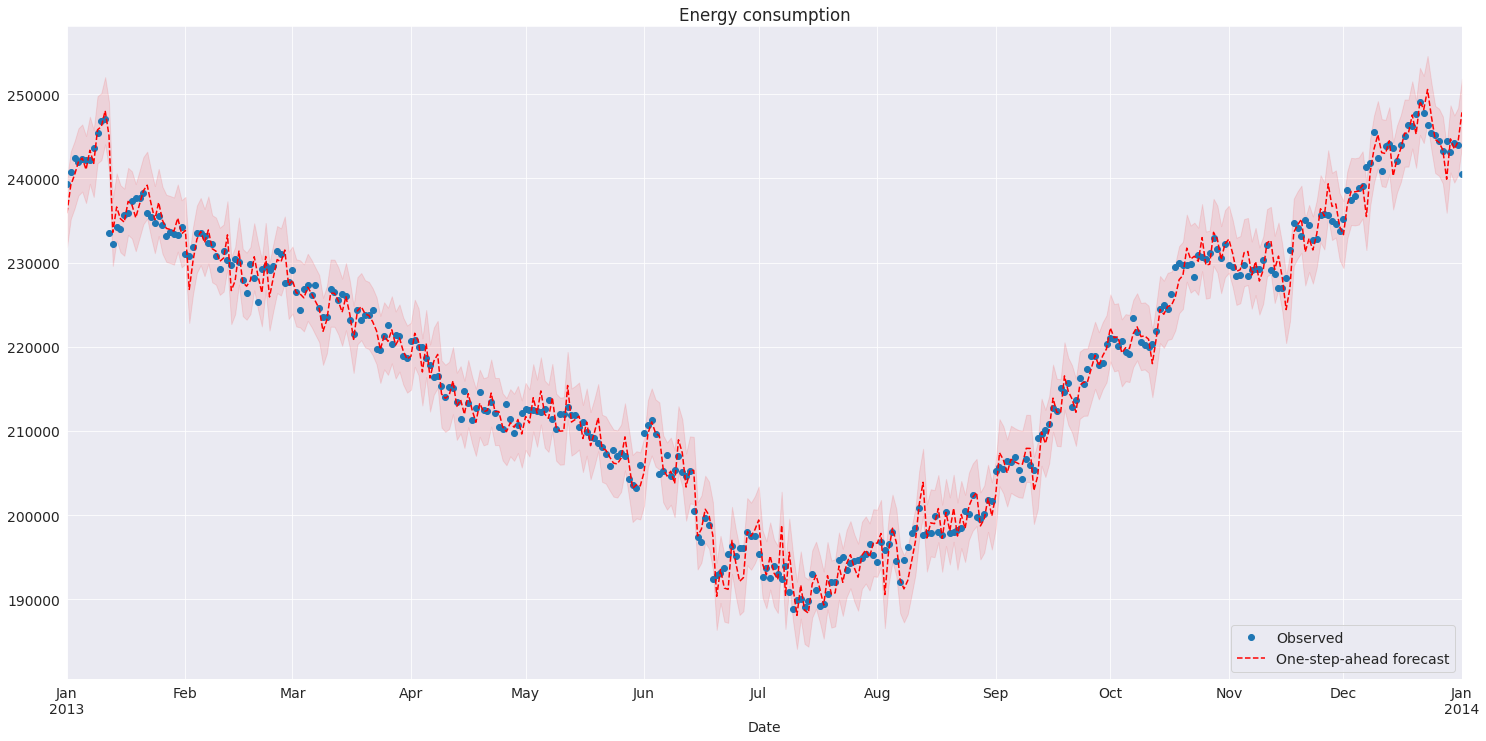

In [226]:
# Graph
fig, ax = plt.subplots(figsize=[25,12])
npre = 4
ax.set(title='Energy consumption', xlabel='Date')

start = '2013-01-01'
end = '2014-01-01'

# Plot data points
ts1.loc[start:end]['EnergyConsumption'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
ts_pred_int = ts_pred.predicted_mean + ts1.shift(365)['EnergyConsumption']
ts_pred_int[start:end].plot(ax=ax, style='r--', label='One-step-ahead forecast')

ci_low = (ts_pred_ci.loc[:,ts_pred_ci.columns[0]] + ts1.shift(365)['EnergyConsumption']).loc[start:end]
ci_high = (ts_pred_ci.loc[:,ts_pred_ci.columns[1]] + ts1.shift(365)['EnergyConsumption']).loc[start:end]
ax.fill_between(ci_low.index, ci_low, ci_high, color='r', alpha=0.1)

legend = ax.legend(loc='lower right')

In [227]:
# Build forecast
ts_sdiff_2 = ts_sdiff[-len(ts2):]
exogs = ts_sdiff_2[['Saturday', 'Sunday', 'Temp1']]
ts_frc = arima_best_aic.forecast(steps=len(ts_sdiff_2), exog=exogs)
ts_frc_int = (ts_frc + ts.shift(365)['EnergyConsumption']).iloc[-len(ts2):]

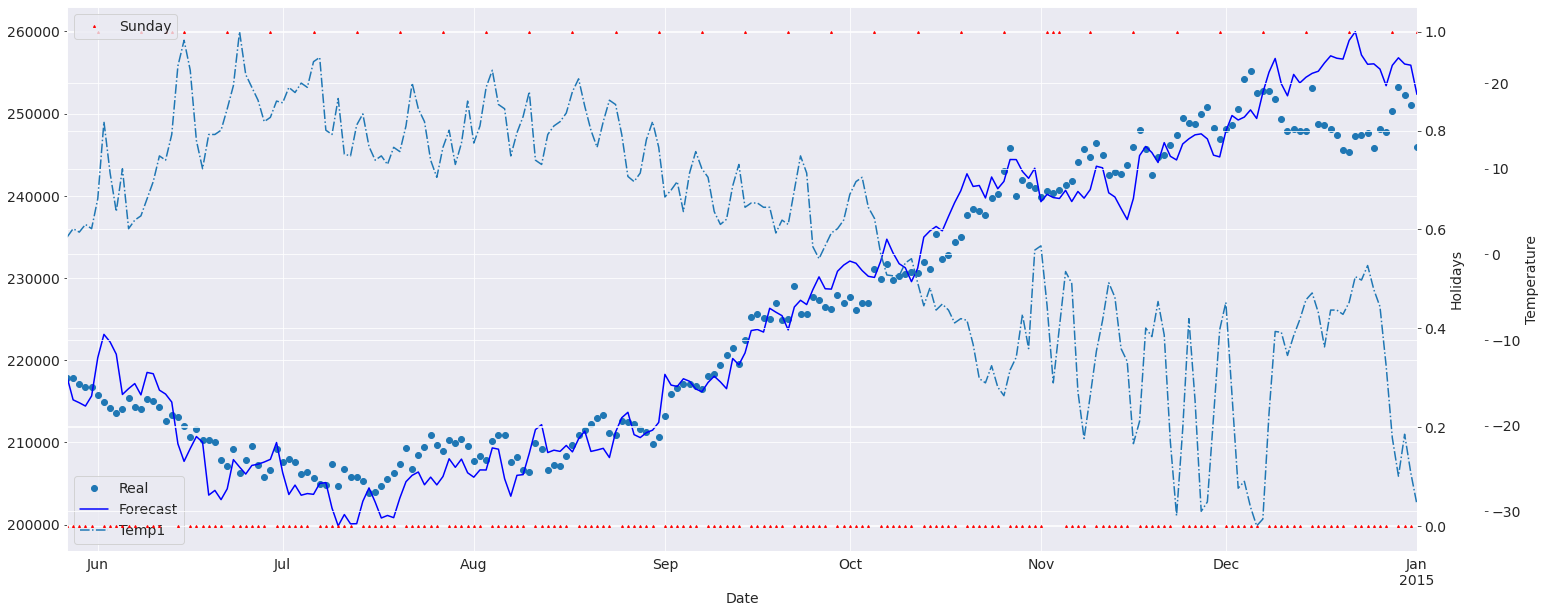

In [228]:
# Plot the TS together with independent variables
fig, ax = plt.subplots(figsize=[30,10])
ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
ax3.set_ylabel('Temperature')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

ts2['EnergyConsumption'].plot(ax = ax,  style='o', label='Real')
ts_frc_int.plot(ax = ax,  style='b-', label='Forecast')
ts2[['Sunday']].plot(ax = ax2, style='r', marker = '^', markersize = 2.0, linewidth=0.0)

for col in exogs.columns:
    if col.startswith('Temp'):
        style = '--' if col.endswith('Less') else '-.'
        ts2[col].plot(ax = ax3,  style=style)

lines = ax.get_lines() + ax3.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='lower left', ncol=1)
ax2.legend(loc='upper left')
plt.show()

In [229]:
# MAPE for the whole forecasting period
qualityMAPE(ts2['EnergyConsumption'], ts_frc_int)[0]

0.013032517145029043

In [230]:
# MAPE for the last 3 months of the forecasting period
qualityMAPE(ts2['EnergyConsumption'][:'2014-09'], ts_frc_int[:'2015-01'])[0]

0.011324146475145618

                                     SARIMAX Results                                     
Dep. Variable:                 EnergyConsumption   No. Observations:                  512
Model:             SARIMAX([2, 3], 1, [2, 3, 4])   Log Likelihood                 -33.263
Date:                           Mon, 16 Jan 2023   AIC                             84.526
Time:                                   21:10:59   BIC                            122.653
Sample:                               12-31-2012   HQIC                            99.473
                                    - 05-26-2014                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Saturday   -1349.8800   1.27e-08  -1.06e+11      0.000   -1349.880   -1349.880
Sunday     -1694.3016   1.01e-08  -1.67e+11

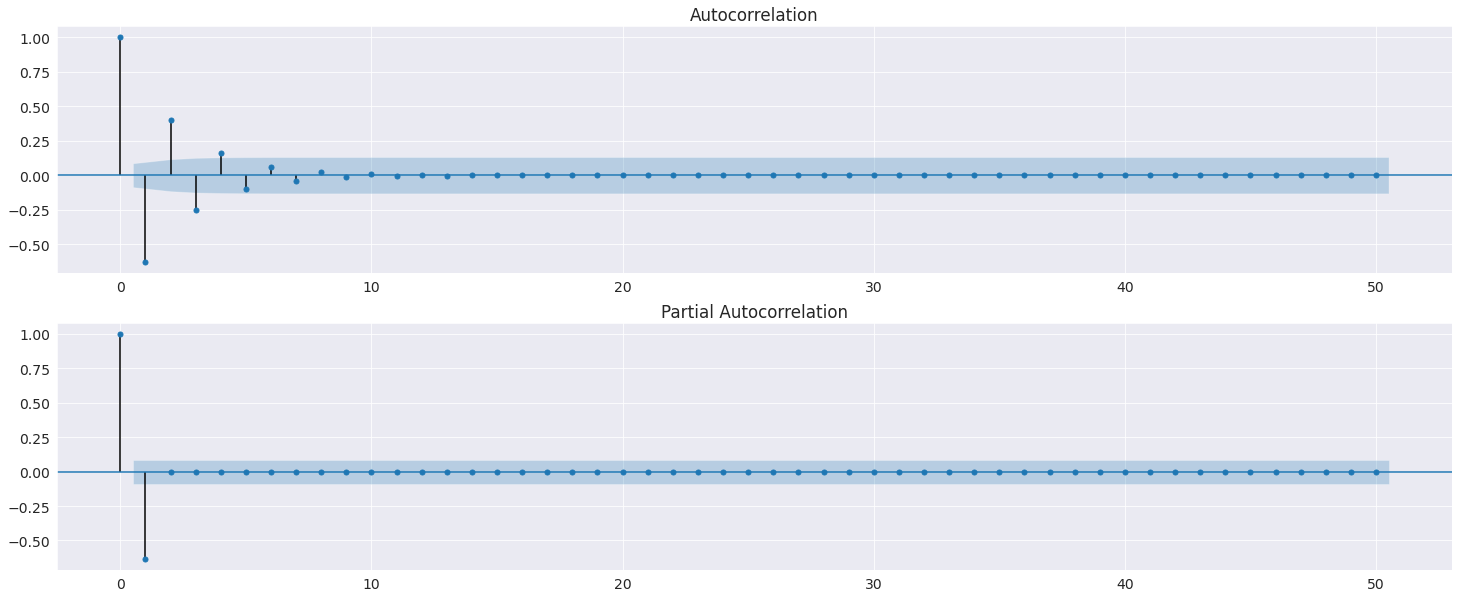

In [234]:
# Grid search of the optimal arima model by minimal BIC value 
min_bic = np.inf
arima_opt_bic = None

count = 0

for p in p_arr:
  for q in q_arr:
    ts_sdiff_1 = ts_sdiff[:-len(ts2)]
    endog = ts_sdiff_1['EnergyConsumption']
    exogs = ts_sdiff_1[['Saturday', 'Sunday', 'Temp1']]

    arima_best = sm.tsa.SARIMAX(endog=endog, order=[p, d, q], exog=exogs).fit()
    if arima_best.bic < min_bic:
      min_bic = arima_best.bic
      arima_opt_bic = arima_best


print(arima_opt_bic.summary())
plot_acf_pacf(arima_opt_bic, lags=50)

Got exactly the same model as for AIC

                                     SARIMAX Results                                     
Dep. Variable:                 EnergyConsumption   No. Observations:                  512
Model:             SARIMAX([2, 3], 1, [2, 3, 4])   Log Likelihood                 -33.263
Date:                           Mon, 16 Jan 2023   AIC                             84.526
Time:                                   21:14:43   BIC                            122.653
Sample:                               12-31-2012   HQIC                            99.473
                                    - 05-26-2014                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Saturday   -1349.8800   1.27e-08  -1.06e+11      0.000   -1349.880   -1349.880
Sunday     -1694.3016   1.01e-08  -1.67e+11

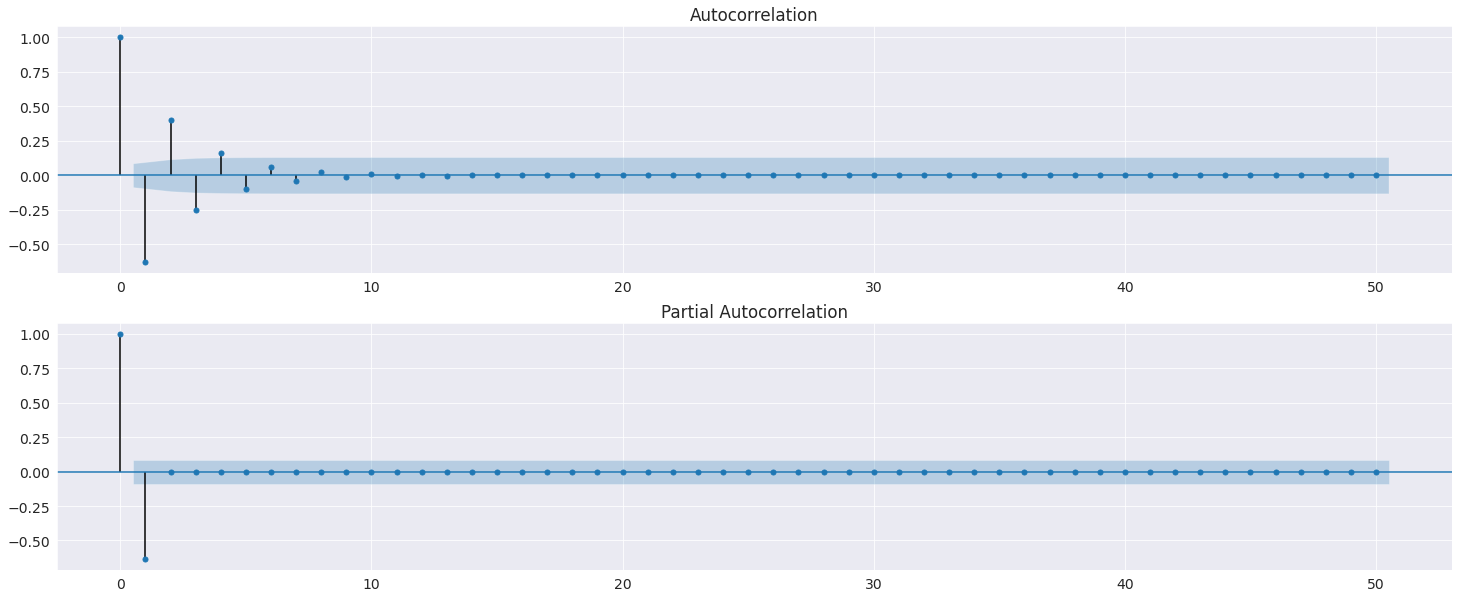

In [236]:
# Grid search of the optimal arima model by minimal HQIC value 
min_hqic = np.inf
arima_opt_hqic = None

count = 0

for p in p_arr:
  for q in q_arr:
    ts_sdiff_1 = ts_sdiff[:-len(ts2)]
    endog = ts_sdiff_1['EnergyConsumption']
    exogs = ts_sdiff_1[['Saturday', 'Sunday', 'Temp1']]

    arima_best = sm.tsa.SARIMAX(endog=endog, order=[p, d, q], exog=exogs).fit()
    if arima_best.hqic < min_hqic:
      min_hqic = arima_best.hqic
      arima_opt_hqic = arima_best


print(arima_opt_hqic.summary())
plot_acf_pacf(arima_opt_hqic, lags=50)

Got exactly the same model as for AIC

Summing up at last, qualityMAPE (0.013049483867253723) for arima model SARIMAX([2, 4], 1, [3]) (generated manually) higher but not much than qualityMAPE (0.013032517145029043) arima model SARIMAX([3], 1, [2]) (generated automatically).

<h1 align="center"> Theoretical Bonus Part (Extra 50%)</h1>

<br></br>


**3. How to select candiates for $p$ and $q$ parameters for simple ARMA model based on ACF and PACF.**

We can select the order p for AR(p) model based on significant spikes from the PACF plot. One more indication of the AR process is that the ACF plot decays more slowly. Everything outside the blue boundary of the PACF plot tell us the order of the AR model

The MA(q) model calculates its forecast value by taking a weighted average of past errors. In contrast to the AR model, we can select the order q for model MA(q) from ACF if this plot has a sharp cut-off after lag q. Similar to selecting p for the AR  model, in order to select the appropriate q order for the MA model, we need to analyze all spikes higher than the blue area. 

Usually values p and q are not higher than 10, we can apply grid search. Also, in order to find the best combination of p and q, we need to have some objective function that will measure model performance on a validation set.  Usually, we can use AIC and BIC for that purpose. The lower the value of these criteria, the better the model is.

<h1 align="center"> Practical Bonus Part (Extra 50%)</h1>

Realize method for searching optimal $\lambda$ for boxcox transformation.
Approach for finding the optimal $\lambda$ is descibed <a href="https://www.academia.edu/23049010/Time_series_analysis_supported_by_power_transformations">here</a>.  

You need to replace all 'TODO' below by some code:

In [253]:
import numpy as np
class boxcox():
    def __init__(self, lmbda=None, shift=0):
        '''
    Box Cox Transforms
    Transforms data are to be normal. Also known as power transform.
    
    Parameters
        ----------
    lmbda: float or None
        lmbda the power parameter. The None input automatically calculates
        lmbda based on method guerrero
    shift: float
        Use to normalize data by shifting data to all positive values
        
        '''
        self.lmbda = lmbda
        self.shift = shift
        self.y = []
        self.method = 'guerrero'

    def transform(self, x, n=2):
        '''
            x: time series
            n: number of subseries with constant dispersion
        '''
        x = 1.0 * np.asarray(x)
        
        if self.shift > 0:
            x = x + self.shift
            
        if self.lmbda is None:
            self.lmbda = self.optimal_lambda(x, n)
            
        if self.lmbda == 0:
            self.y = np.log(x)
        else:
            self.y = (x ** self.lmbda - 1) / self.lmbda

        return self.y, self.lmbda
        

    def optimal_lambda(self, x, n=2):
        """
        Parameters
        ----------
        x - time series with different variance through the time
        n - number of subseries in x, each subseries x_i has constant variance sigma_i and constant mean m_i
        The method states, that optimal lambda should be chosen in such a way that
         
         sigma_i/(m_i)**(1-lambda) = constant, for all i=1,...,n
        
        you need to find solution for the follow Regression problem:
        
        log(sigma_i) = w_1 + w_2*log(m_i), where
        w_2 = 1-lambda
        
        """
        x = 1.0 * np.asarray(x)
               
        sigma = np.ones(n)
        m = np.ones(2 * n).reshape(2, n)

        r = len(x) / n  # the length of each subseries

        for i in range(n):
            m[1][i] = np.log(np.array_split(x, n)[i].mean())
            sigma[i] = np.log(np.array_split(x, n)[i].var()) / 2

        # find the solution for regression Xw=y, where X = m, w[1] = 1-lambda,
        w = np.dot(np.linalg.inv(np.dot(m,m.T)),m.dot(sigma))[1]
        
        self.lmbda = 1 - w
        
        return self.lmbda

    def inverse(self, y=None):
        """
        Parameters
        ----------
        y: time series

        Returns
        -------
        x: inverse transformed ts
    
        """
        if y is None:
            y = self.y
        
        if self.lmbda == 0:
            x = np.exp(y)
        else:
            x = (self.lmbda * y + 1) ** (1 / self.lmbda)
        return x

In [260]:
# Check on Wage data
# boxcox transformation for wage dataset 
ts_wage = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/33b78c9be63831567f8036ad40c5859e824d30f7/data/monthly-wage.csv', sep=';', decimal='.', parse_dates=True, index_col='Month')

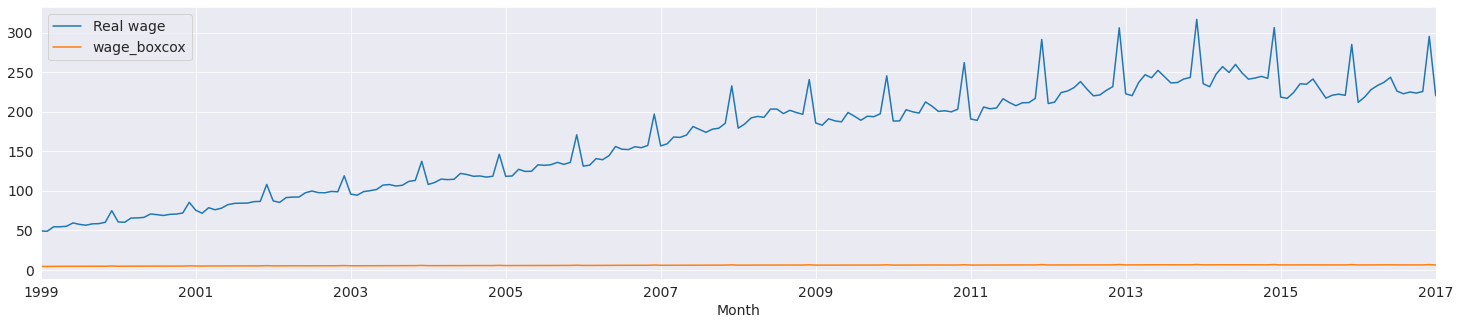

In [264]:
# cut first steps
ts_wage = ts_wage.loc['01.01.1999':'01.01.2017']
ts_wage.plot(figsize=(25,5));

lambda= 0.05321780079270866


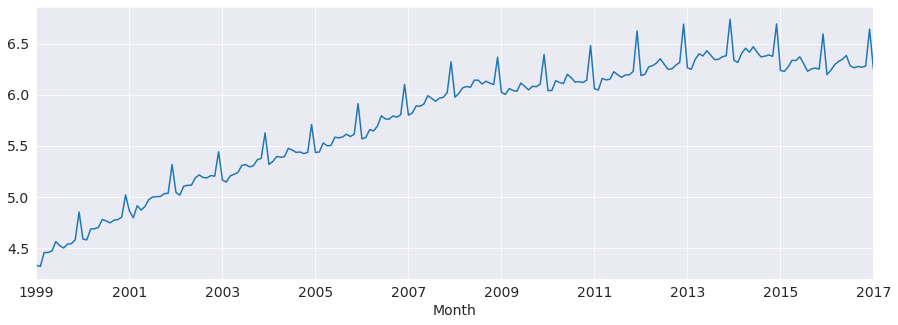

In [263]:
bc = boxcox()
ts_wage['wage_boxcox'], lmbda = bc.transform(ts_wage['Real wage'], n=18)
print('lambda=', lmbda)
ts_wage['wage_boxcox'].plot(figsize=(15,5));